In [2]:
import pandas as pd
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica' ## or whatever fontface you want

In [3]:
results_df = pd.read_csv("model_props_with_r2_master.csv")

In [4]:
results_df.columns

Index(['name', 'family', 'parameters', 'activation_function', 'instruct_tuned',
       'architecture', 'modality', 'fine_tuned', 'training_tokens', 'n_layers',
       'n_heads', 'n_kv_heads', 'attn_dim', 'hidden_size', 'vocab_size',
       'max_pos_embed', 'intermediate_size', 'average', 'ifeval', 'bbh',
       'math', 'gpqa', 'musr', 'mmlu', 'r2', 'rdm_corr', 'cka'],
      dtype='object')

/tmp/ipykernel_1940123/3459222849.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(
/tmp/ipykernel_1940123/3459222849.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1940123/3459222849.py:18: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.barplot(


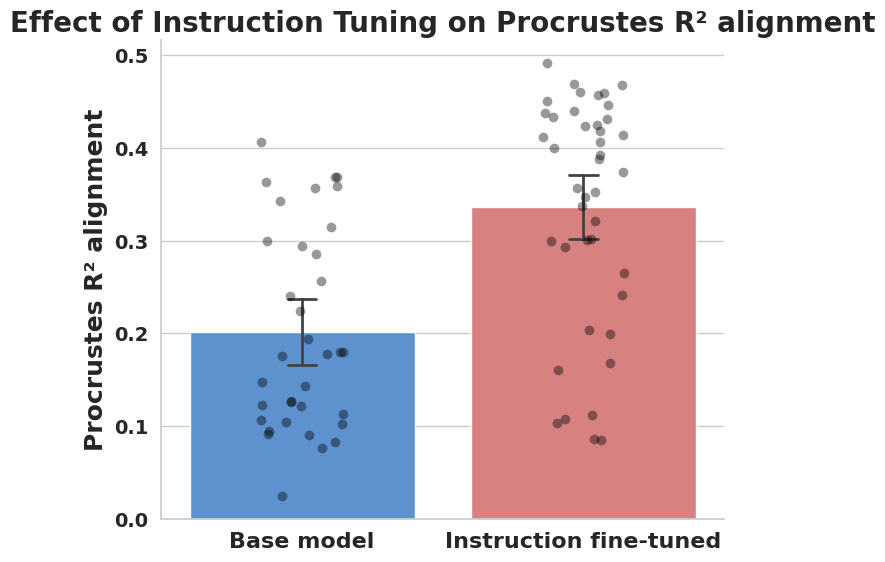

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns



# Copy and relabel tuning status
results_df = results_df.copy()
results_df["tuning_status"] = results_df["instruct_tuned"].map(
    {False: "Base model", True: "Instruction fine-tuned"}
)

# White background, larger font
sns.set_theme(style="whitegrid", font_scale=1.6)

plt.figure(figsize=(7, 6))

# Bar plot with lighter colors
sns.barplot(
    data=results_df,
    x="tuning_status",
    y="r2",
    ci=95,
    capsize=0.1,
    errwidth=2,
    palette=["#4a90e2", "#e57373"]  # lighter blue & lighter red
)

# Overlay faded dots (all black, semi-transparent)
sns.stripplot(
    data=results_df,
    x="tuning_status",
    y="r2",
    color="black",
    alpha=0.4,
    jitter=0.15,
    size=7,
    marker="o"
)

plt.ylabel("Procrustes R² alignment", fontsize=18, weight="bold")
plt.xlabel("")
plt.title("Effect of Instruction Tuning on Procrustes R² alignment", fontsize=20, weight="bold")

# Bold, larger ticks
plt.xticks(fontsize=16, weight="bold")
plt.yticks(fontsize=14, weight="bold")

# Remove legend entirely
plt.legend([], [], frameon=False)

sns.despine()
plt.tight_layout()

plt.savefig("results_plots/it.pdf", bbox_inches="tight")

plt.show()




In [6]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica' ## or whatever fontface you want

# Copy and relabel tuning status
results_df = results_df.copy()
results_df["tuning_status"] = results_df["instruct_tuned"].map(
    {False: "Base model", True: "Instruction fine-tuned"}
)

# --- Flip baseline so Instruction fine-tuned comes first ---
results_df["tuning_status"] = results_df["tuning_status"].astype("category")
results_df["tuning_status"] = results_df["tuning_status"].cat.reorder_categories(
    ["Instruction fine-tuned", "Base model"], ordered=True
)

# --- Independent samples t-test (flip order so tuned - base) ---
tuned = results_df.loc[results_df["tuning_status"] == "Instruction fine-tuned", "r2"]
base = results_df.loc[results_df["tuning_status"] == "Base model", "r2"]

t_stat, p_val = ttest_ind(tuned, base, equal_var=False)  # tuned first
print("Independent t-test: Instruction fine-tuned vs. Base")
print(f"t = {t_stat:.3f}, p = {p_val:.4f}")
print(f"Mean (Instruction fine-tuned) = {tuned.mean():.3f}, Mean (Base) = {base.mean():.3f}")

# --- Plot ---
sns.set_theme(style="whitegrid", font_scale=1.6)

plt.figure(figsize=(7, 6))
sns.barplot(
    data=results_df,
    x="tuning_status",
    y="r2",
    errorbar=("ci", 95),   # updated for seaborn >=0.14
    err_kws={"linewidth": 2},
    capsize=0.1,
    palette=["#e57373", "#4a90e2"]  # tuned first, base second
)

sns.stripplot(
    data=results_df,
    x="tuning_status",
    y="r2",
    color="black",
    alpha=0.4,
    jitter=0.15,
    size=7,
    marker="o"
)

plt.ylabel("Procrustes R² alignment", fontsize=18, weight="bold")
plt.xlabel("")
plt.title("Effect of Instruction Tuning on Procrustes R² alignment", fontsize=20, weight="bold")
plt.xticks(fontsize=16, weight="bold")
plt.yticks(fontsize=14, weight="bold")
plt.legend([], [], frameon=False)

sns.despine()
plt.tight_layout()
plt.show()


NameError: name 'ttest_ind' is not defined

/tmp/ipykernel_1940123/695422456.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1940123/695422456.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1940123/695422456.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1940123/695422456.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1940123/695422456.py:108: Fut

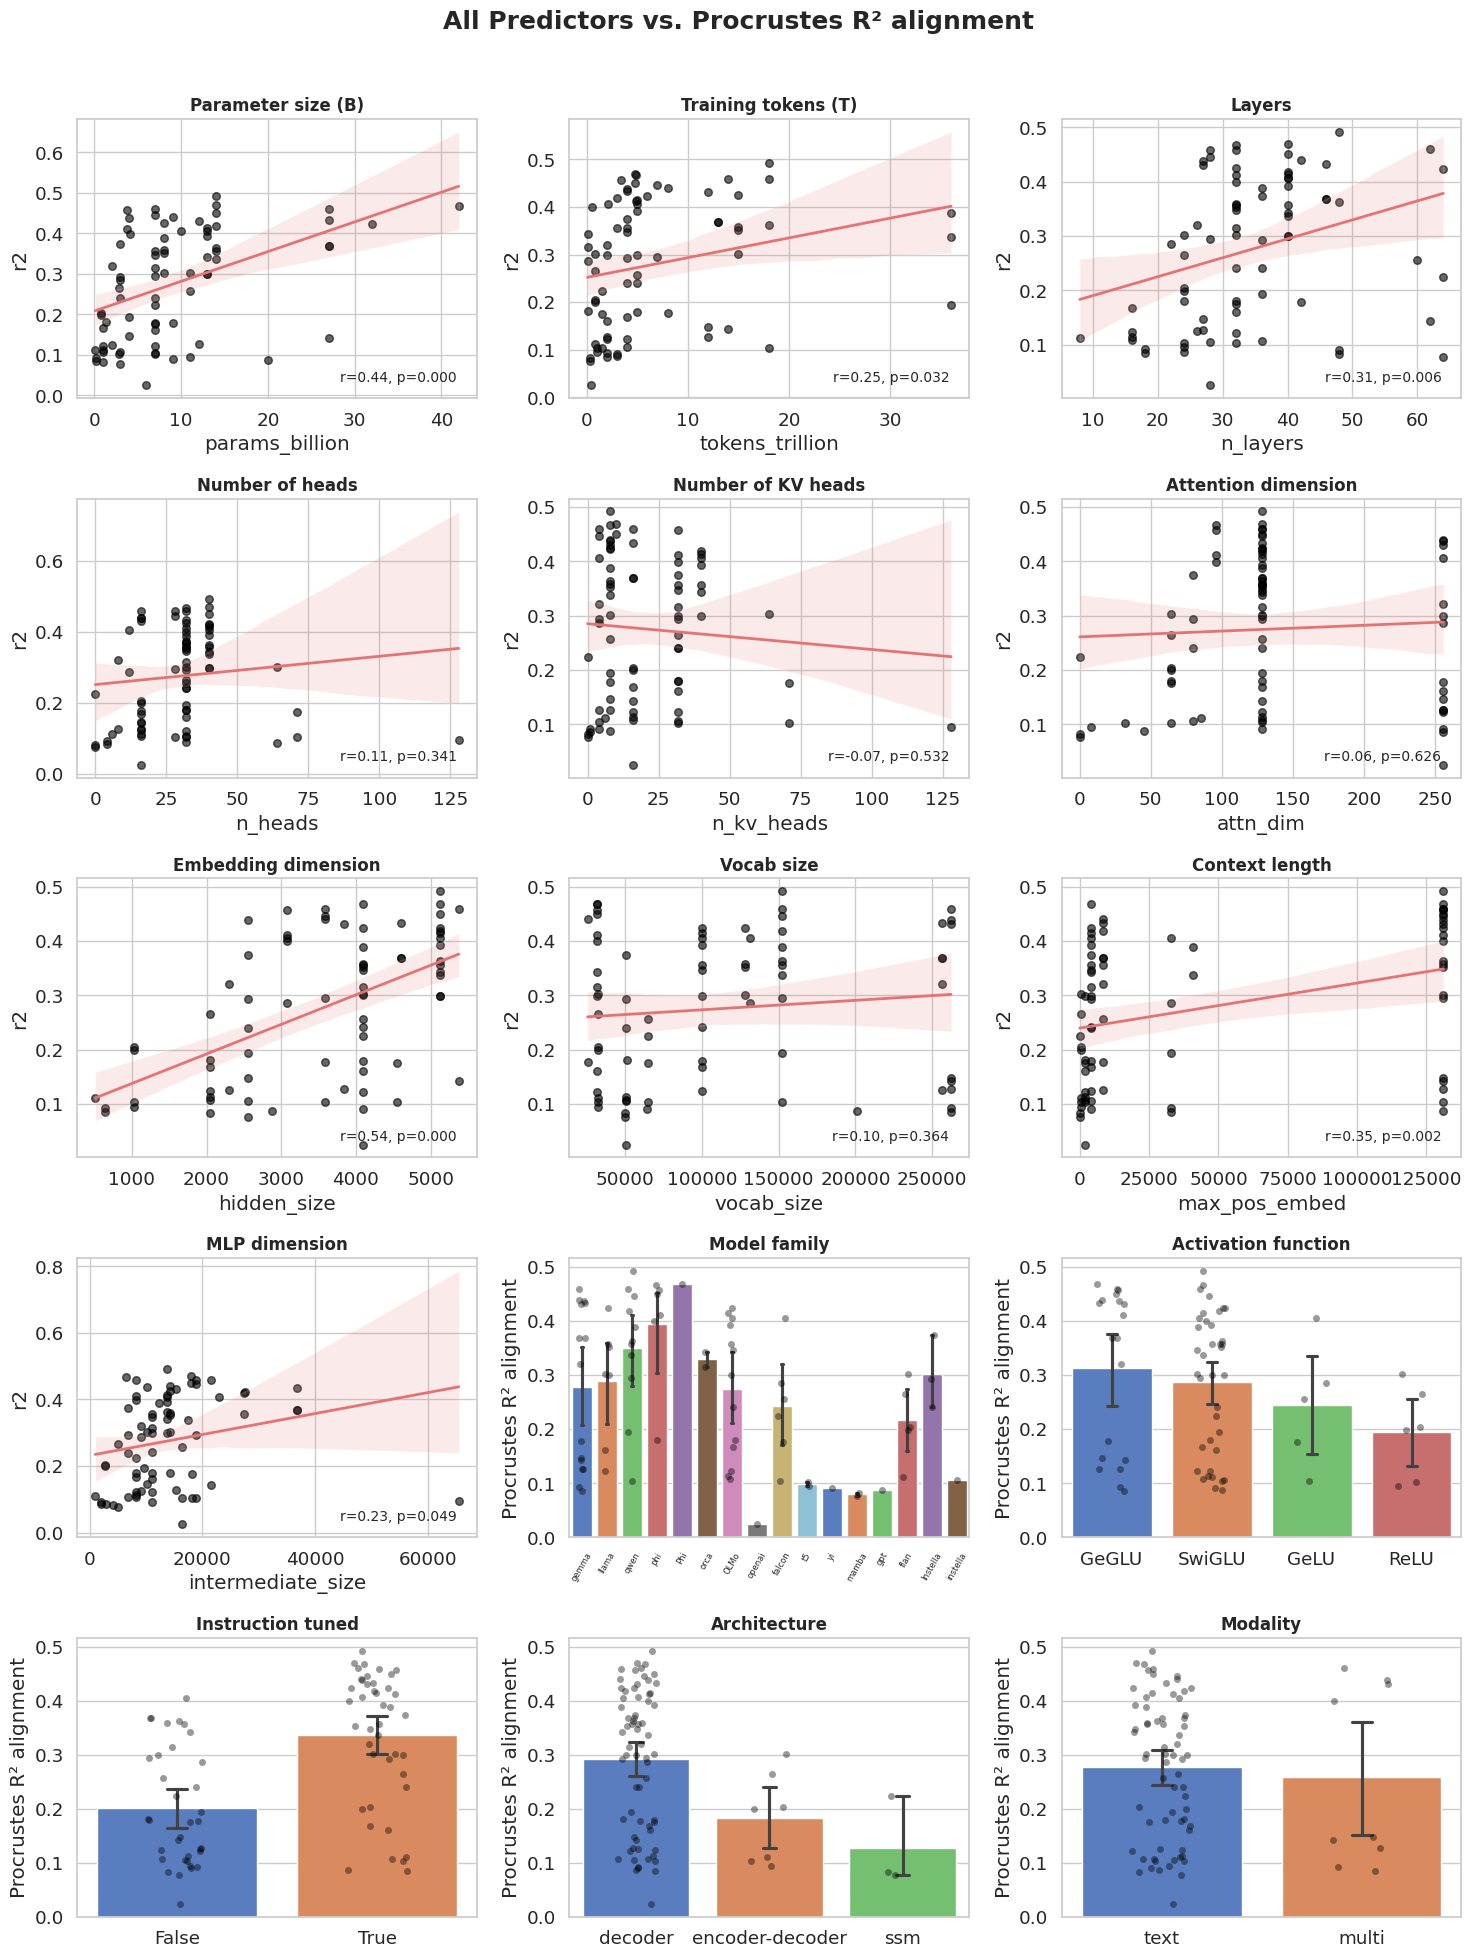

In [41]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd

# --- Font setup for PDF export ---
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'

# --- Parse helpers ---
def parse_size_value(value_str):
    if pd.isna(value_str):
        return None
    value_str = str(value_str).strip().upper()
    if value_str.endswith("B"):
        return float(value_str[:-1])
    elif value_str.endswith("T"):
        return float(value_str[:-1]) * 1000
    else:
        try:
            return float(value_str)
        except:
            return None

def parse_training_tokens(tokens_str):
    if pd.isna(tokens_str):
        return None
    tokens_str = str(tokens_str).strip().upper()
    if tokens_str.endswith("T"):
        return float(tokens_str[:-1])
    else:
        try:
            return float(tokens_str)
        except:
            return None

# --- Copy df and parse numeric columns ---
df = results_df.copy()
df["params_billion"] = df["parameters"].apply(parse_size_value)
df["tokens_trillion"] = df["training_tokens"].apply(parse_training_tokens)

# Fix modality values
df["modality"] = df["modality"].str.replace("multimodal", "multi", case=False)

# Predictors
continuous_predictors = [
    "params_billion", "tokens_trillion", "n_layers", "n_heads", "n_kv_heads",
    "attn_dim", "hidden_size", "vocab_size", "max_pos_embed", "intermediate_size"
]
categorical_predictors = [
    "family", "activation_function", "instruct_tuned", "architecture", "modality"
]

pretty_labels = {
    "params_billion": "Parameter size (B)",
    "tokens_trillion": "Training tokens (T)",
    "n_layers": "Layers",
    "n_heads": "Number of heads",
    "n_kv_heads": "Number of KV heads",
    "attn_dim": "Attention dimension",
    "hidden_size": "Embedding dimension",
    "vocab_size": "Vocab size",
    "max_pos_embed": "Context length",
    "intermediate_size": "MLP dimension",
    "family": "Model family",
    "activation_function": "Activation function",
    "instruct_tuned": "Instruction tuned",
    "architecture": "Architecture",
    "modality": "Modality"
}

# Collect plots
n_total = len(continuous_predictors) + len(categorical_predictors)
n_cols = 3
n_rows = int((n_total + n_cols - 1) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

plot_idx = 0

# --- Continuous predictors ---
for pred in continuous_predictors:
    ax = axes[plot_idx]
    plot_idx += 1
    df_sub = df[[pred, "r2"]].dropna().copy()
    if df_sub.empty:
        continue
    r, p = pearsonr(df_sub[pred], df_sub["r2"])
    sns.regplot(
        data=df_sub,
        x=pred, y="r2",
        ax=ax,
        scatter_kws={"alpha": 0.6, "s": 30, "color": "black"},
        line_kws={"color": "#e57373", "linewidth": 2}
    )
    ax.set_title(pretty_labels[pred], fontsize=12, weight="bold")
    ax.text(0.95, 0.05, f"r={r:.2f}, p={p:.3f}",
            ha="right", va="bottom", transform=ax.transAxes, fontsize=10)

# --- Categorical predictors ---
for cat in categorical_predictors:
    ax = axes[plot_idx]
    plot_idx += 1
    df_cat = df[[cat, "r2"]].dropna().copy()
    sns.barplot(
        data=df_cat, x=cat, y="r2",
        ax=ax,
        errorbar=("ci", 95),
        capsize=0.1,
        palette="muted"
    )
    sns.stripplot(
        data=df_cat, x=cat, y="r2",
        ax=ax,
        color="black", alpha=0.4, jitter=0.15, size=5
    )
    ax.set_title(pretty_labels[cat], fontsize=12, weight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Procrustes R² alignment")
    
    if cat == "family":
        ax.tick_params(axis="x", labelsize=6, rotation=60)

# Remove unused subplots
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("All Predictors vs. Procrustes R² alignment", fontsize=18, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("results_plots/all_predictors_r2.pdf", bbox_inches="tight")
plt.show()


Number of heads: r=0.520, p=0.0000, n=72
Number of KV heads: r=0.140, p=0.2327, n=74
Attention dimension: r=0.301, p=0.0258, n=55
Embeddings dimension: r=0.536, p=0.0000, n=77
MLP dimension: r=0.404, p=0.0004, n=73


/mnt/dv/wid/projects3/Rogers-muri-human-ai/zstuddiford/tmp/miniconda3/envs/alignment_benchmark_env/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/mnt/dv/wid/projects3/Rogers-muri-human-ai/zstuddiford/tmp/miniconda3/envs/alignment_benchmark_env/lib/python3.11/site-packages/seaborn/regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


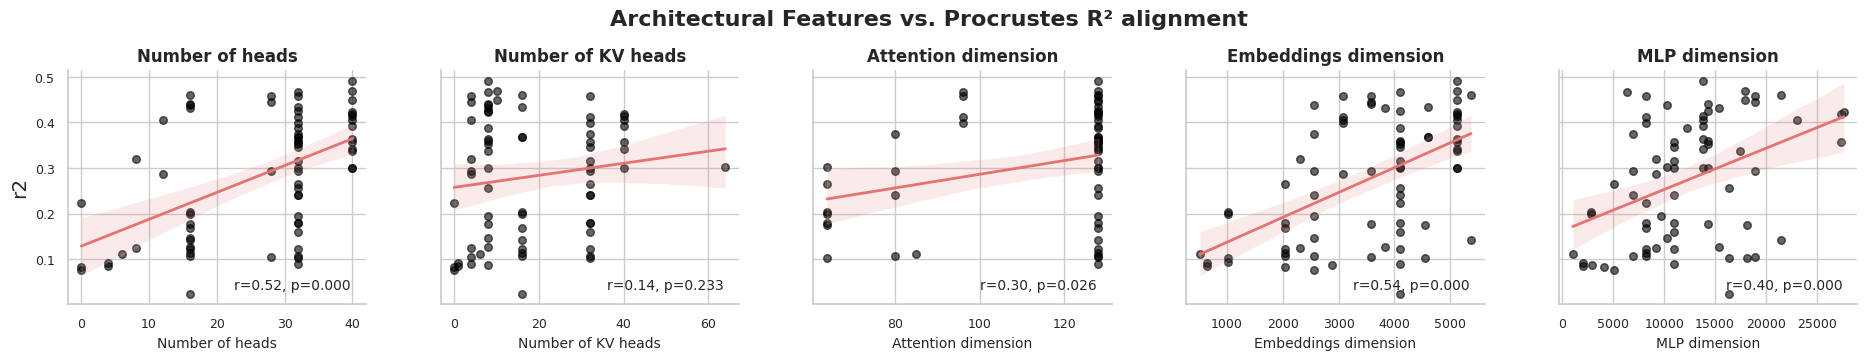

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'

# Predictors of interest
predictors = [
    "n_heads",
    "n_kv_heads",
    "attn_dim",
    "hidden_size",
    "intermediate_size"
]

# Pretty labels
pretty_labels = {
    "n_heads": "Number of heads",
    "n_kv_heads": "Number of KV heads",
    "attn_dim": "Attention dimension",
    "hidden_size": "Embeddings dimension",
    "intermediate_size": "MLP dimension"
}

results_df = results_df.copy()
plot_dfs = []
corrs = {}

for pred in predictors:
    # Drop outliers
    Q1 = results_df[pred].quantile(0.25)
    Q3 = results_df[pred].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df_filt = results_df[(results_df[pred] >= lower) & (results_df[pred] <= upper)].copy()
    
    # Correlation (raw values)
    r, p = pearsonr(df_filt[pred], df_filt["r2"])
    corrs[pred] = (r, p, pretty_labels[pred])
    print(f"{pretty_labels[pred]}: r={r:.3f}, p={p:.4f}, n={len(df_filt)}")
    
    # Prepare for plotting
    df_filt["predictor"] = pretty_labels[pred]
    df_filt = df_filt.rename(columns={pred: "x"})
    plot_dfs.append(df_filt[["x", "r2", "predictor"]])

plot_df = pd.concat(plot_dfs, ignore_index=True)

# Plot with independent x-axis scales
sns.set_theme(style="whitegrid", font_scale=1.2)
g = sns.lmplot(
    data=plot_df,
    x="x",
    y="r2",
    col="predictor",
    col_wrap=len(predictors),
    sharey=True,
    sharex=False,   # <<< KEY: independent x-scales
    height=3.8,
    scatter_kws={"alpha": 0.6, "s": 30, "color": "black"},
    line_kws={"color": "#e57373", "linewidth": 2}
)

plt.subplots_adjust(top=0.82, wspace=0.25)
g.fig.suptitle(
    "Architectural Features vs. Procrustes R² alignment",
    fontsize=16,
    weight="bold"
)

# Titles and r/p annotations
for ax, pred in zip(g.axes.flat, predictors):
    ax.set_title(pretty_labels[pred], fontsize=12, weight="bold")
    ax.set_xlabel(pretty_labels[pred], fontsize=10)
    r, p, _ = corrs[pred]
    ax.text(
        0.95, 0.05,
        f"r={r:.2f}, p={p:.3f}",
        ha="right", va="bottom",
        transform=ax.transAxes,
        fontsize=10
    )
    ax.tick_params(axis="both", which="both", labelsize=9)

plt.savefig("results_plots/architecture_dims.pdf", bbox_inches="tight")
plt.show()


Independent t-test: Text vs. Other modalities
t = 0.339, p = 0.7424
Mean (Text) = 0.278, Mean (Other) = 0.258


/tmp/ipykernel_1722402/289259103.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


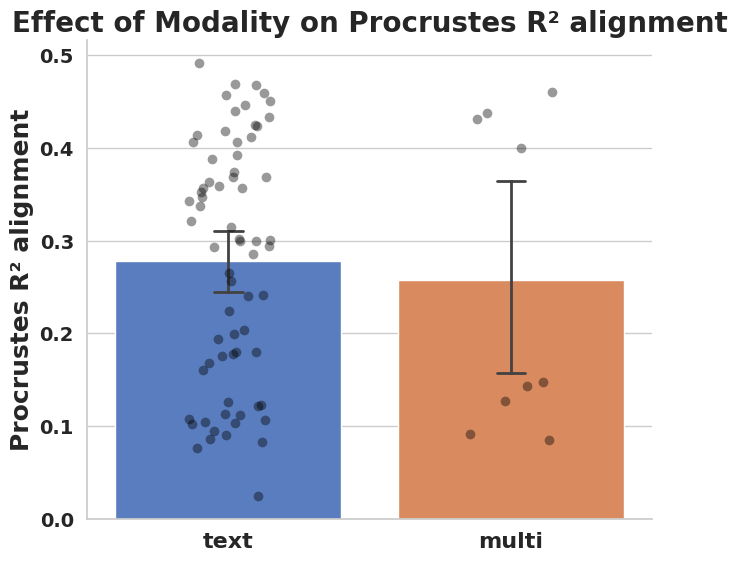

In [6]:
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica' ## or whatever fontface you want
# --- Copy and clean modality column ---
results_df = results_df.copy()
results_df["modality"] = results_df["modality"].str.lower()
results_df["modality"] = results_df["modality"].str.replace("multimodal", "multi")
results_df["modality"] = results_df["modality"].astype("category")

# Ensure consistent category order (so 'text' first, then others)
cats = list(results_df["modality"].cat.categories)
if "text" in cats:
    cats = [c for c in cats if c != "text"]
    cats.insert(0, "text")
results_df["modality"] = results_df["modality"].cat.reorder_categories(cats, ordered=True)

# --- Independent samples t-test: text vs. non-text ---
text = results_df.loc[results_df["modality"] == "text", "r2"]
other = results_df.loc[results_df["modality"] != "text", "r2"]

t_stat, p_val = ttest_ind(text, other, equal_var=False)
print("Independent t-test: Text vs. Other modalities")
print(f"t = {t_stat:.3f}, p = {p_val:.4f}")
print(f"Mean (Text) = {text.mean():.3f}, Mean (Other) = {other.mean():.3f}")

# --- Plot ---
sns.set_theme(style="whitegrid", font_scale=1.6)

plt.figure(figsize=(7, 6))
sns.barplot(
    data=results_df,
    x="modality",
    y="r2",
    errorbar=("ci", 95),
    err_kws={"linewidth": 2},
    capsize=0.1,
    palette="muted"
)

sns.stripplot(
    data=results_df,
    x="modality",
    y="r2",
    color="black",
    alpha=0.4,
    jitter=0.15,
    size=7,
    marker="o"
)

plt.ylabel("Procrustes R² alignment", fontsize=18, weight="bold")
plt.xlabel("")
plt.title("Effect of Modality on Procrustes R² alignment", fontsize=20, weight="bold")
plt.xticks(fontsize=16, weight="bold")
plt.yticks(fontsize=14, weight="bold")
plt.legend([], [], frameon=False)

sns.despine()
plt.tight_layout()
plt.savefig("results_plots/modality.pdf", bbox_inches="tight")

plt.show()


In [7]:
results_df["activation_function"]

0      GeGLU
1      GeGLU
2      GeGLU
3      GeGLU
4      GeGLU
       ...  
72    SwiGLU
73    SwiGLU
74    SwiGLU
75    SwiGLU
76    SwiGLU
Name: activation_function, Length: 77, dtype: object

ANOVA: Activation function differences in R² alignment
F = 1.362, p = 0.2623


/tmp/ipykernel_1722402/2268268670.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


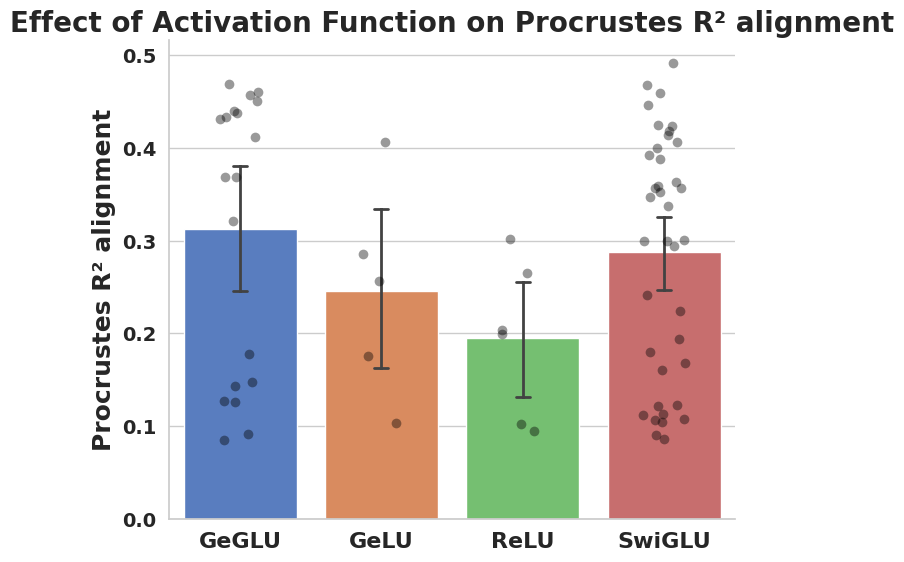

In [8]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# --- Font setup for PDF export ---
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'  # or any fontface you want

# --- Copy and clean activation_function column ---
results_df = results_df.copy()
results_df["activation_function"] = results_df["activation_function"].astype("category")

# --- One-way ANOVA across activation functions ---
groups = [results_df.loc[results_df["activation_function"] == af, "r2"].dropna()
          for af in results_df["activation_function"].cat.categories]

f_stat, p_val = f_oneway(*groups)
print("ANOVA: Activation function differences in R² alignment")
print(f"F = {f_stat:.3f}, p = {p_val:.4f}")

# --- Plot ---
sns.set_theme(style="whitegrid", font_scale=1.6)

plt.figure(figsize=(7, 6))
sns.barplot(
    data=results_df,
    x="activation_function",
    y="r2",
    errorbar=("ci", 95),
    err_kws={"linewidth": 2},
    capsize=0.1,
    palette="muted"
)

sns.stripplot(
    data=results_df,
    x="activation_function",
    y="r2",
    color="black",
    alpha=0.4,
    jitter=0.15,
    size=7,
    marker="o"
)

plt.ylabel("Procrustes R² alignment", fontsize=18, weight="bold")
plt.xlabel("")
plt.title("Effect of Activation Function on Procrustes R² alignment", fontsize=20, weight="bold")
plt.xticks(fontsize=16, weight="bold")
plt.yticks(fontsize=14, weight="bold")
plt.legend([], [], frameon=False)

sns.despine()
plt.tight_layout()
plt.savefig("results_plots/activation_function.pdf", bbox_inches="tight")

plt.show()


ANOVA: Activation function differences in MATH benchmark
F = 2.773, p = 0.0554


/tmp/ipykernel_1738405/821430842.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


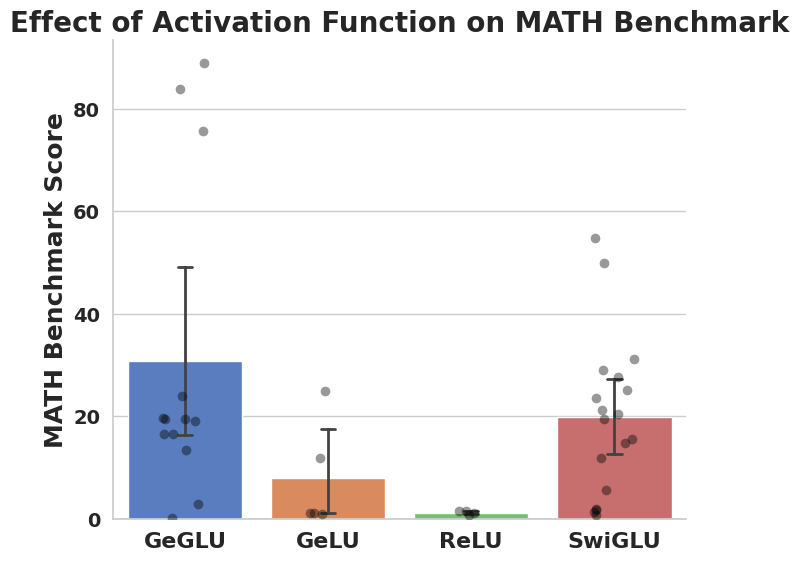

In [19]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# --- Font setup for PDF export ---
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'  # or any fontface you want

# --- Copy and clean activation_function column ---
results_df = results_df.copy()
results_df["activation_function"] = results_df["activation_function"].astype("category")

# --- One-way ANOVA across activation functions ---
groups = [results_df.loc[results_df["activation_function"] == af, "math"].dropna()
          for af in results_df["activation_function"].cat.categories]

f_stat, p_val = f_oneway(*groups)
print("ANOVA: Activation function differences in MATH benchmark")
print(f"F = {f_stat:.3f}, p = {p_val:.4f}")

# --- Plot ---
sns.set_theme(style="whitegrid", font_scale=1.6)

plt.figure(figsize=(7, 6))
sns.barplot(
    data=results_df,
    x="activation_function",
    y="math",
    errorbar=("ci", 95),
    err_kws={"linewidth": 2},
    capsize=0.1,
    palette="muted"
)

sns.stripplot(
    data=results_df,
    x="activation_function",
    y="math",
    color="black",
    alpha=0.4,
    jitter=0.15,
    size=7,
    marker="o"
)

plt.ylabel("MATH Benchmark Score", fontsize=18, weight="bold")
plt.xlabel("")
plt.title("Effect of Activation Function on MATH Benchmark", fontsize=20, weight="bold")
plt.xticks(fontsize=16, weight="bold")
plt.yticks(fontsize=14, weight="bold")
plt.legend([], [], frameon=False)

sns.despine()
plt.tight_layout()
plt.savefig("results_plots/activation_function_math.pdf", bbox_inches="tight")

plt.show()


ANOVA: Activation function differences in BBH
F = 2.945, p = 0.0472


/tmp/ipykernel_1722402/3885894114.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


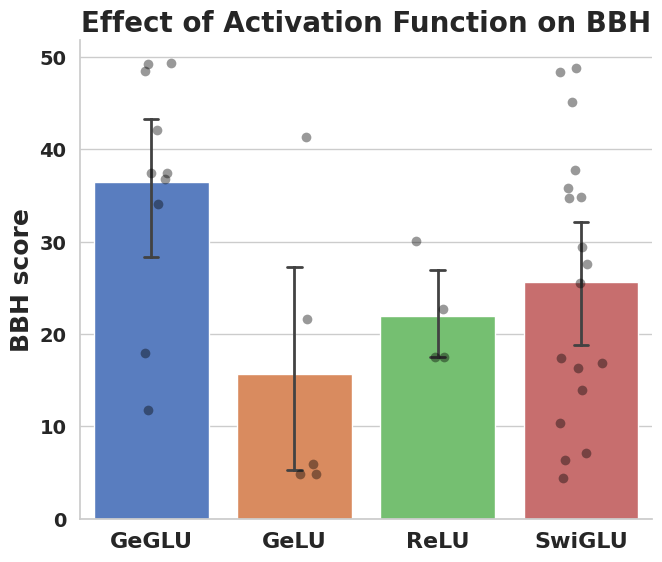

In [9]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# --- Font setup for PDF export ---
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'  # or any fontface you want

# --- Copy and clean activation_function column ---
results_df = results_df.copy()
results_df["activation_function"] = results_df["activation_function"].astype("category")

# --- One-way ANOVA across activation functions ---
groups = [results_df.loc[results_df["activation_function"] == af, "bbh"].dropna()
          for af in results_df["activation_function"].cat.categories]

f_stat, p_val = f_oneway(*groups)
print("ANOVA: Activation function differences in BBH")
print(f"F = {f_stat:.3f}, p = {p_val:.4f}")

# --- Plot ---
sns.set_theme(style="whitegrid", font_scale=1.6)

plt.figure(figsize=(7, 6))
sns.barplot(
    data=results_df,
    x="activation_function",
    y="bbh",
    errorbar=("ci", 95),
    err_kws={"linewidth": 2},
    capsize=0.1,
    palette="muted"
)

sns.stripplot(
    data=results_df,
    x="activation_function",
    y="bbh",
    color="black",
    alpha=0.4,
    jitter=0.15,
    size=7,
    marker="o"
)

plt.ylabel("BBH score", fontsize=18, weight="bold")
plt.xlabel("")
plt.title("Effect of Activation Function on BBH", fontsize=20, weight="bold")
plt.xticks(fontsize=16, weight="bold")
plt.yticks(fontsize=14, weight="bold")
plt.legend([], [], frameon=False)

sns.despine()
plt.tight_layout()
plt.savefig("results_plots/activation_function_bbh.pdf", bbox_inches="tight")

plt.show()


Parameters (billions): r=0.445, p=0.0001


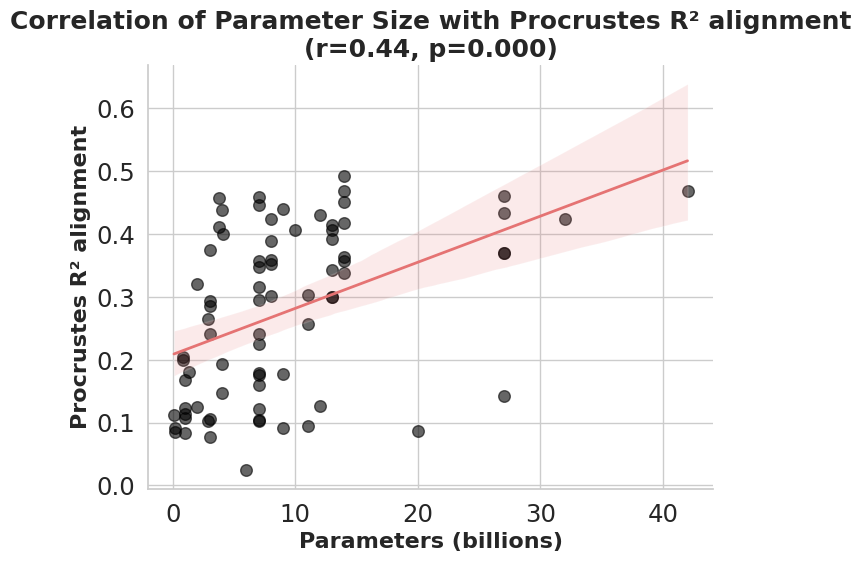

In [ ]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica' ## or whatever fontface you want
# --- Clean parameter size column ---
results_df = results_df.copy()
results_df["params_billion"] = (
    results_df["parameters"]
    .str.replace("B", "", regex=False)
    .astype(float)
)

# --- Correlation ---
r, p = pearsonr(results_df["params_billion"], results_df["r2"])
print(f"Parameters (billions): r={r:.3f}, p={p:.4f}")

# --- Plot ---
sns.set_theme(style="whitegrid", font_scale=1.6)
plt.figure(figsize=(7, 6))

sns.regplot(
    data=results_df,
    x="params_billion",
    y="r2",
    scatter_kws={"alpha": 0.6, "s": 70, "color": "black"},
    line_kws={"color": "#e57373", "linewidth": 2}
)

plt.xlabel("Parameters (billions)", fontsize=16, weight="bold")
plt.ylabel("Procrustes R² alignment", fontsize=16, weight="bold")
plt.title(
    f"Correlation of Parameter Size with Procrustes R² alignment\n(r={r:.2f}, p={p:.3f})",
    fontsize=18, weight="bold"
)

sns.despine()
plt.tight_layout()
plt.savefig("results_plots/param_size.pdf", bbox_inches="tight")

plt.show()


Number of layers: r=0.309, p=0.0062


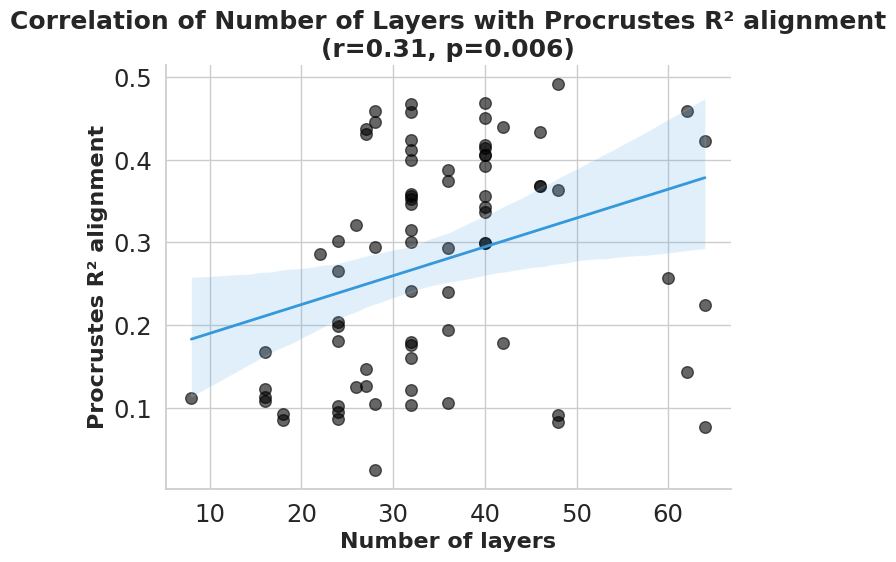

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica' ## or whatever fontface you want
# --- Copy data ---
results_df = results_df.copy()

# --- Correlation ---
r, p = pearsonr(results_df["n_layers"], results_df["r2"])
print(f"Number of layers: r={r:.3f}, p={p:.4f}")

# --- Plot ---
sns.set_theme(style="whitegrid", font_scale=1.6)
plt.figure(figsize=(7, 6))

sns.regplot(
    data=results_df,
    x="n_layers",
    y="r2",
    scatter_kws={"alpha": 0.6, "s": 70, "color": "black"},
    line_kws={"color": "#3498db", "linewidth": 2}
)

plt.xlabel("Number of layers", fontsize=16, weight="bold")
plt.ylabel("Procrustes R² alignment", fontsize=16, weight="bold")
plt.title(
    f"Correlation of Number of Layers with Procrustes R² alignment\n(r={r:.2f}, p={p:.3f})",
    fontsize=18, weight="bold"
)

sns.despine()
plt.tight_layout()
plt.savefig("results_plots/n_layers.pdf", bbox_inches="tight")

plt.show()


Removed 9 outliers
Training tokens (trillions): r=0.329, p=0.0061


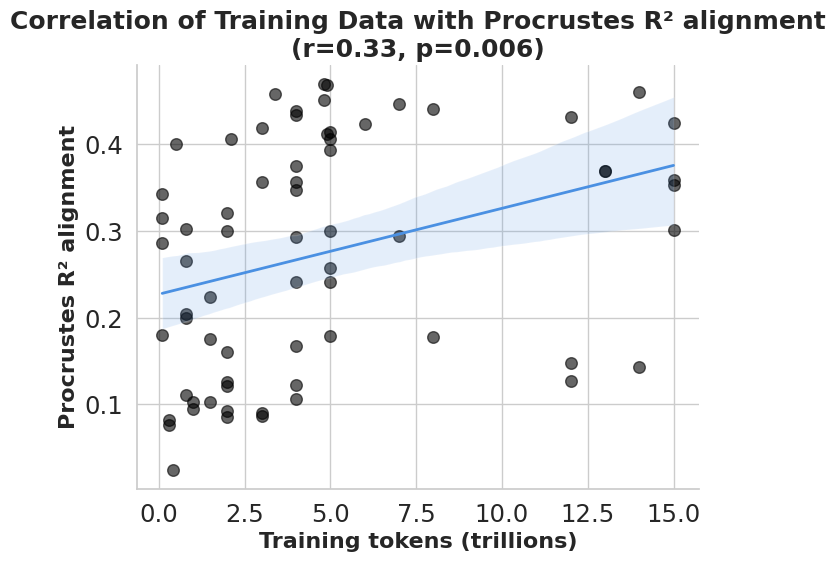

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica' ## or whatever fontface you want
# --- Clean training tokens column ---
results_df = results_df.copy()
results_df["tokens_trillion"] = (
    results_df["training_tokens"]
    .str.replace("T", "", regex=False)
    .astype(float)
)

# --- Drop outliers with 1.5×IQR rule ---
Q1 = results_df["tokens_trillion"].quantile(0.25)
Q3 = results_df["tokens_trillion"].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
filtered_df = results_df[
    (results_df["tokens_trillion"] >= lower) &
    (results_df["tokens_trillion"] <= upper)
].copy()

print(f"Removed {len(results_df) - len(filtered_df)} outliers")

# --- Correlation ---
r, p = pearsonr(filtered_df["tokens_trillion"], filtered_df["r2"])
print(f"Training tokens (trillions): r={r:.3f}, p={p:.4f}")

# --- Plot ---
sns.set_theme(style="whitegrid", font_scale=1.6)
plt.figure(figsize=(7, 6))

sns.regplot(
    data=filtered_df,
    x="tokens_trillion",
    y="r2",
    scatter_kws={"alpha": 0.6, "s": 70, "color": "black"},
    line_kws={"color": "#4a90e2", "linewidth": 2}
)

plt.xlabel("Training tokens (trillions)", fontsize=16, weight="bold")
plt.ylabel("Procrustes R² alignment", fontsize=16, weight="bold")
plt.title(
    f"Correlation of Training Data with Procrustes R² alignment\n(r={r:.2f}, p={p:.3f})",
    fontsize=18, weight="bold"
)

sns.despine()
plt.tight_layout()
plt.savefig("results_plots/training_toks.pdf", bbox_inches="tight")

plt.show()


Removed 0 outliers
Vocabulary size: r=0.105, p=0.3641


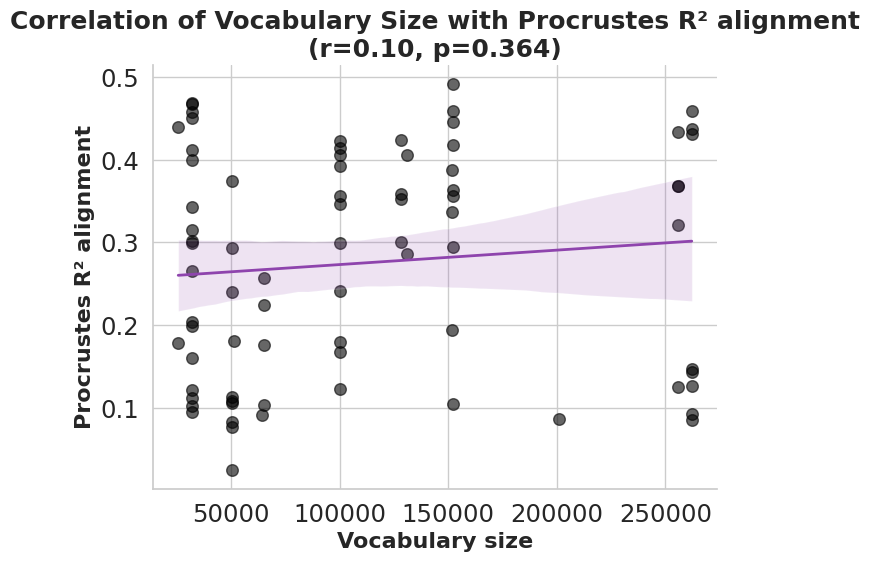

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica' ## or whatever fontface you want
# --- Copy data ---
results_df = results_df.copy()

# --- Drop outliers with 1.5×IQR rule ---
Q1 = results_df["vocab_size"].quantile(0.25)
Q3 = results_df["vocab_size"].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
filtered_df = results_df[
    (results_df["vocab_size"] >= lower) &
    (results_df["vocab_size"] <= upper)
].copy()

print(f"Removed {len(results_df) - len(filtered_df)} outliers")

# --- Correlation ---
r, p = pearsonr(filtered_df["vocab_size"], filtered_df["r2"])
print(f"Vocabulary size: r={r:.3f}, p={p:.4f}")

# --- Plot ---
sns.set_theme(style="whitegrid", font_scale=1.6)
plt.figure(figsize=(7, 6))

sns.regplot(
    data=filtered_df,
    x="vocab_size",
    y="r2",
    scatter_kws={"alpha": 0.6, "s": 70, "color": "black"},
    line_kws={"color": "#8e44ad", "linewidth": 2}
)

plt.xlabel("Vocabulary size", fontsize=16, weight="bold")
plt.ylabel("Procrustes R² alignment", fontsize=16, weight="bold")
plt.title(
    f"Correlation of Vocabulary Size with Procrustes R² alignment\n(r={r:.2f}, p={p:.3f})",
    fontsize=18, weight="bold"
)

sns.despine()
plt.tight_layout()
plt.savefig("results_plots/vocab_size.pdf", bbox_inches="tight")

plt.show()


Removed 0 outliers
Context length: r=0.352, p=0.0017


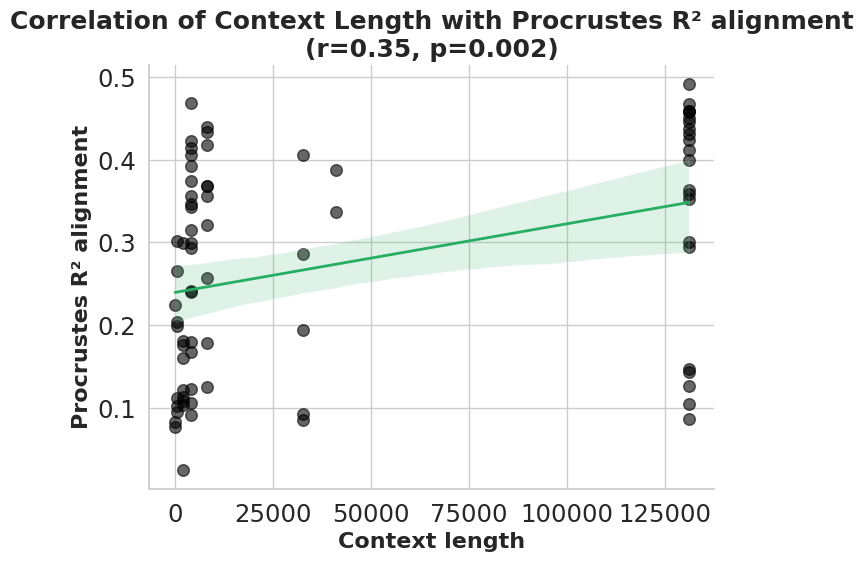

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica' ## or whatever fontface you want
# --- Copy data ---
results_df = results_df.copy()

# --- Drop outliers with 1.5×IQR rule ---
Q1 = results_df["max_pos_embed"].quantile(0.25)
Q3 = results_df["max_pos_embed"].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
filtered_df = results_df[
    (results_df["max_pos_embed"] >= lower) &
    (results_df["max_pos_embed"] <= upper)
].copy()

print(f"Removed {len(results_df) - len(filtered_df)} outliers")

# --- Correlation ---
r, p = pearsonr(filtered_df["max_pos_embed"], filtered_df["r2"])
print(f"Context length: r={r:.3f}, p={p:.4f}")

# --- Plot ---
sns.set_theme(style="whitegrid", font_scale=1.6)
plt.figure(figsize=(7, 6))

sns.regplot(
    data=filtered_df,
    x="max_pos_embed",
    y="r2",
    scatter_kws={"alpha": 0.6, "s": 70, "color": "black"},
    line_kws={"color": "#27ae60", "linewidth": 2}
)

plt.xlabel("Context length", fontsize=16, weight="bold")
plt.ylabel("Procrustes R² alignment", fontsize=16, weight="bold")
plt.title(
    f"Correlation of Context Length with Procrustes R² alignment\n(r={r:.2f}, p={p:.3f})",
    fontsize=18, weight="bold"
)

sns.despine()
plt.tight_layout()
plt.savefig("results_plots/context_length.pdf", bbox_inches="tight")

plt.show()


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# --- One-way ANOVA ---
model = ols("r2 ~ C(activation_function)", data=results_df).fit()
anova_results = anova_lm(model, typ=2)  # Type II ANOVA
print("\n--- ANOVA Results ---")
print(anova_results)




--- ANOVA Results ---
                          sum_sq    df         F    PR(>F)
C(activation_function)  0.071730   3.0  1.362198  0.262328
Residual                1.123356  64.0       NaN       NaN


                   params_billion  tokens_trillion  n_layers   n_heads  \
params_billion           1.000000         0.210336  0.546558  0.275285   
tokens_trillion          0.210336         1.000000  0.179046  0.014458   
n_layers                 0.546558         0.179046  1.000000 -0.001201   
n_heads                  0.275285         0.014458 -0.001201  1.000000   
n_kv_heads              -0.001774        -0.314188 -0.118078  0.798218   
attn_dim                -0.025898         0.075824 -0.175663 -0.364164   
hidden_size              0.653136         0.289962  0.623245  0.279178   
vocab_size               0.271579         0.378628  0.050209 -0.243240   
max_pos_embed            0.214421         0.411877 -0.002291 -0.038499   
intermediate_size        0.514471         0.148562  0.289767  0.557596   

                   n_kv_heads  attn_dim  hidden_size  vocab_size  \
params_billion      -0.001774 -0.025898     0.653136    0.271579   
tokens_trillion     -0.314188  0.075824     0.289

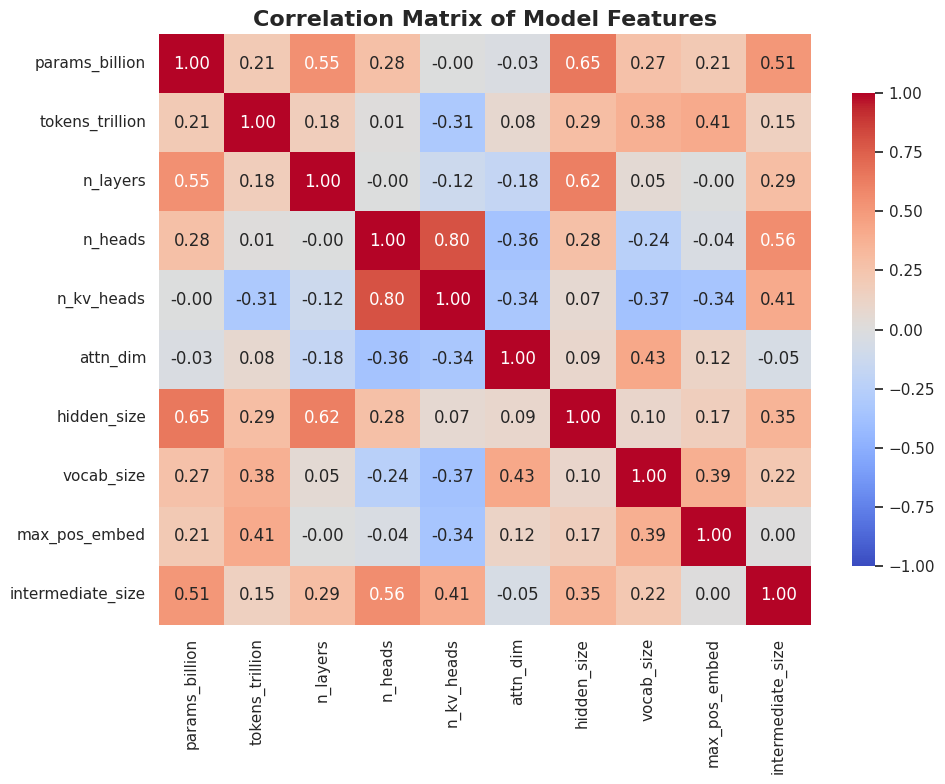

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Copy + clean ---
results_df = results_df.copy()

# Clean params
results_df["params_billion"] = (
    results_df["parameters"]
    .str.replace("B", "", regex=False)
    .astype(float)
)

# Clean training tokens
results_df["tokens_trillion"] = (
    results_df["training_tokens"]
    .str.replace("T", "", regex=False)
    .astype(float)
)

# Features of interest
features = [
    "params_billion",
    "tokens_trillion",
    "n_layers",
    "n_heads",
    "n_kv_heads",
    "attn_dim",
    "hidden_size",
    "vocab_size",
    "max_pos_embed",
    "intermediate_size"
]

# --- Compute correlation matrix ---
corr_matrix = results_df[features].corr(method="pearson")
print(corr_matrix)

# --- Plot heatmap ---
sns.set_theme(style="whitegrid", font_scale=1.0)
plt.figure(figsize=(10, 8))

ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix of Model Features", fontsize=16, weight="bold")
plt.tight_layout()
plt.savefig("results_plots/feature_corr_matrix.pdf", bbox_inches="tight")

plt.show()


Attention dimension vs. Number of heads: r=-0.364, p=0.0011


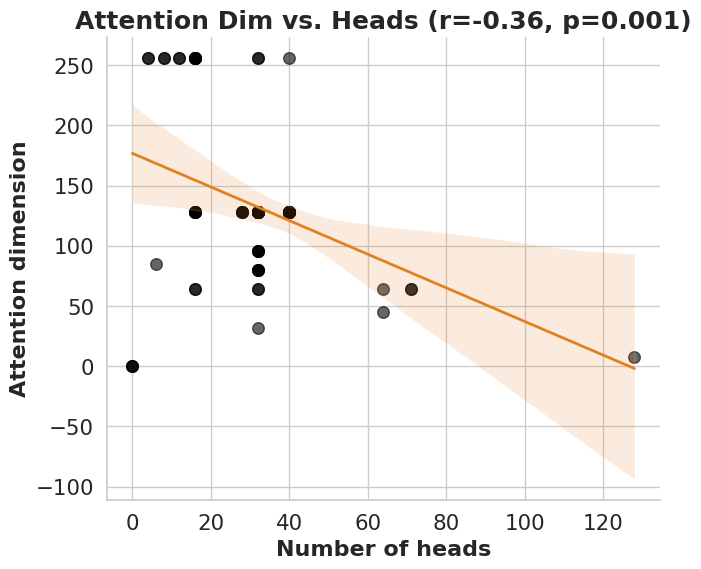

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# --- Copy ---
results_df = results_df.copy()

# --- Correlation ---
r, p = pearsonr(results_df["attn_dim"], results_df["n_heads"])
print(f"Attention dimension vs. Number of heads: r={r:.3f}, p={p:.4f}")

# --- Plot ---
sns.set_theme(style="whitegrid", font_scale=1.4)
plt.figure(figsize=(7, 6))

sns.regplot(
    data=results_df,
    x="n_heads",
    y="attn_dim",
    scatter_kws={"alpha": 0.6, "s": 70, "color": "black"},
    line_kws={"color": "#e67e22", "linewidth": 2}
)

plt.xlabel("Number of heads", fontsize=16, weight="bold")
plt.ylabel("Attention dimension", fontsize=16, weight="bold")
plt.title(
    f"Attention Dim vs. Heads (r={r:.2f}, p={p:.3f})",
    fontsize=18, weight="bold"
)

sns.despine()
plt.tight_layout()
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

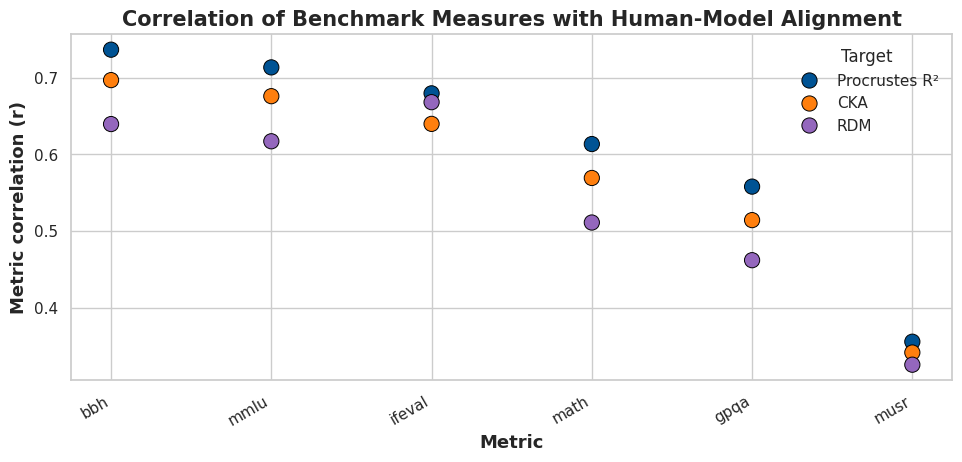

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'  # or whatever fontface you want

# Metrics on x-axis
metrics = ["ifeval", "bbh", "math", "gpqa", "musr", "mmlu"]

# Targets to correlate against
targets = ["r2", "cka", "rdm_corr"]

# --- Compute correlations ---
corrs = []
for target in targets:
    for m in metrics:
        x = results_df[m].values
        y = results_df[target].values
        mask = np.isfinite(x) & np.isfinite(y)
        x, y = x[mask], y[mask]
        corr_obs, _ = pearsonr(x, y)
        corrs.append({"metric": m, "target": target, "corr": corr_obs})

corrs_df = pd.DataFrame(corrs)

# --- Sort metrics by their Procrustes R² correlation (highest → lowest) ---
order = (
    corrs_df.query("target == 'r2'")
    .sort_values("corr", ascending=False)["metric"]
    .tolist()
)

# enforce categorical order
corrs_df["metric"] = pd.Categorical(corrs_df["metric"], categories=order, ordered=True)

# --- Custom palette ---
sexy_palette = {
    "r2": "#005394",       # deep blue
    "cka": "#FF7F0E",      # orange
    "rdm_corr": "#9467BD"  # purple
}

# Legend rename map
legend_map = {
    "r2": "Procrustes R²",
    "cka": "CKA",
    "rdm_corr": "RDM"
}

# --- Plot ---
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=corrs_df,
    x="metric", y="corr",
    hue="target", palette=sexy_palette,
    s=120, marker="o", edgecolor="black", linewidth=0.7
)

plt.xlabel("Metric", fontsize=13, fontweight="bold")
plt.ylabel("Metric correlation (r)", fontsize=13, fontweight="bold")  # fixed here
plt.title("Correlation of Benchmark Measures with Human-Model Alignment", fontsize=15, fontweight="bold")
plt.xticks(rotation=30, ha="right", fontsize=11)
plt.yticks(fontsize=11)

# customize legend labels
handles, labels = plt.gca().get_legend_handles_labels()
labels = [legend_map.get(lbl, lbl) for lbl in labels]
plt.legend(handles, labels, title="Target", fontsize=11, title_fontsize=12, frameon=False)

plt.tight_layout()

# save to pdf
plt.savefig("metric_correlations_iclr_sorted_updated.pdf", format="pdf", bbox_inches="tight")
plt.show()


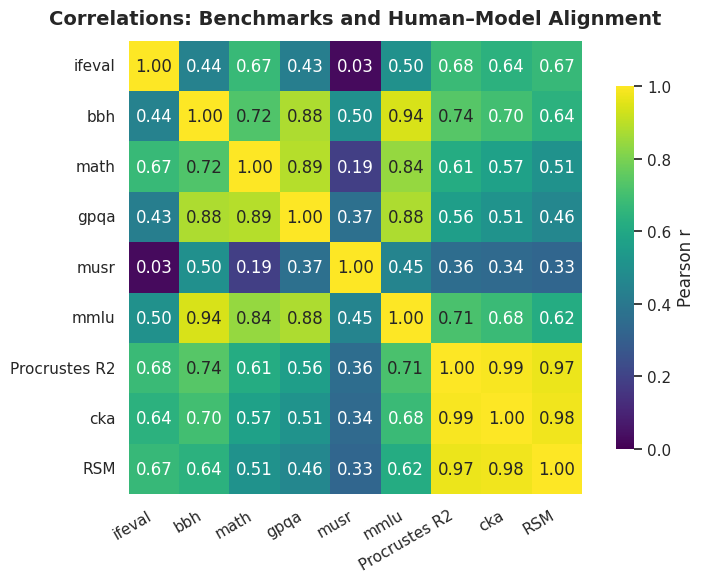

P-value table:
               ifeval     bbh    math    gpqa    musr    mmlu  Procrustes R2  \
ifeval         0.0000  0.0039  0.0000  0.0055  0.8762  0.0008         0.0000   
bbh            0.0039  0.0000  0.0000  0.0000  0.0009  0.0000         0.0000   
math           0.0000  0.0000  0.0000  0.0000  0.2432  0.0000         0.0000   
gpqa           0.0055  0.0000  0.0000  0.0000  0.0183  0.0000         0.0001   
musr           0.8762  0.0009  0.2432  0.0183  0.0000  0.0030         0.0226   
mmlu           0.0008  0.0000  0.0000  0.0000  0.0030  0.0000         0.0000   
Procrustes R2  0.0000  0.0000  0.0000  0.0001  0.0226  0.0000         0.0000   
cka            0.0000  0.0000  0.0001  0.0004  0.0290  0.0000         0.0000   
RSM            0.0000  0.0000  0.0004  0.0016  0.0379  0.0000         0.0000   

                  cka     RSM  
ifeval         0.0000  0.0000  
bbh            0.0000  0.0000  
math           0.0001  0.0004  
gpqa           0.0004  0.0016  
musr           0.0290  0

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import pearsonr

# --- Font setup for PDF export (vector fonts for ICLR) ---
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'

# Metrics + Targets
metrics = ["ifeval", "bbh", "math", "gpqa", "musr", "mmlu"]
targets = ["Procrustes R2", "cka", "RSM"]

rename_map = {"r2": "Procrustes R2", "rdm_corr": "RSM"}
all_vars = metrics + targets

# --- Prepare dataframe with renamed columns ---
df = results_df.copy().rename(columns=rename_map)
df = df[metrics + targets]

# --- Compute correlation and p-value matrices ---
corr_matrix = pd.DataFrame(index=all_vars, columns=all_vars, dtype=float)
pval_matrix = pd.DataFrame(index=all_vars, columns=all_vars, dtype=float)

for i in all_vars:
    for j in all_vars:
        x, y = df[i].values, df[j].values
        mask = np.isfinite(x) & np.isfinite(y)
        if mask.sum() > 1:
            r, p = pearsonr(x[mask], y[mask])
            corr_matrix.loc[i, j] = r
            pval_matrix.loc[i, j] = p
        else:
            corr_matrix.loc[i, j] = np.nan
            pval_matrix.loc[i, j] = np.nan

# --- Plot correlation heatmap ---
plt.figure(figsize=(8, 6))
sns.set_theme(style="whitegrid")

ax = sns.heatmap(
    corr_matrix.astype(float),
    vmin=0, vmax=1, cmap="viridis",
    annot=True, fmt=".2f", square=True,
    cbar_kws={"shrink": 0.8, "label": "Pearson r"}
)

# --- Axis and title polish ---
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

plt.title("Correlations: Benchmarks and Human–Model Alignment",
          fontsize=14, fontweight="bold", pad=12)

plt.tight_layout()
plt.savefig("correlation_matrix_iclr.pdf", format="pdf", bbox_inches="tight")
plt.show()

# --- Save p-value table ---
pval_matrix.to_csv("correlation_pvalues.csv")
print("P-value table:")
print(pval_matrix.round(4))


In [28]:
len(results_df)

77

In [ ]:
from scipy.stats import pearsonr

for m in metrics:
    x = results_df[m].values
    y = results_df["r2"].values
    mask = np.isfinite(x) & np.isfinite(y)
    x, y = x[mask], y[mask]
    corr, pval = pearsonr(x, y)
    print(f"{m:7s}  r = {corr:.3f},  p = {pval:.3g}")


ifeval   r = 0.680,  p = 1.03e-06
bbh      r = 0.737,  p = 4e-08
math     r = 0.613,  p = 9.53e-06
gpqa     r = 0.558,  p = 8.34e-05
musr     r = 0.355,  p = 0.0226
mmlu     r = 0.714,  p = 5.43e-08


In [ ]:
results_df["instruct_tuned"]

0     False
1      True
2     False
3      True
4     False
      ...  
72     True
73     True
74    False
75     True
76     True
Name: instruct_tuned, Length: 77, dtype: bool

In [ ]:
models = ["Instella-3", "Tulu"]

mask = results_df["name"].str.contains("|".join(models), case=False, na=False)
filtered = results_df[mask]
print(filtered)


                        name    family parameters activation_function  \
61  amd/Instella-3B-Instruct  Instella         3B                 NaN   
62           amd/Instella-3B  Instella         3B                 NaN   
63       amd/Instella-3B-SFT  Instella         3B                 NaN   
68        Instella-3B-Stage1  instella         3B              SwiGLU   
69       Llama-3.1-Tulu-3-8B     llama         8B              SwiGLU   
70   Llama-3.1-Tulu-3-8B-DPO     llama         8B              SwiGLU   
71   Llama-3.1-Tulu-3-8B-SFT     llama         8B              SwiGLU   

    instruct_tuned architecture modality  fine_tuned training_tokens  \
61            True      decoder     text        True            4.0T   
62           False      decoder     text       False            4.0T   
63            True      decoder     text        True            4.0T   
68           False      decoder     text       False            4.0T   
69           False      decoder     text       False   

In [25]:
import pandas as pd
import statsmodels.formula.api as smf

# Define stage mapping
stage_labels = {0: "base", 1: "SFT", 2: "DPO", 3: "Instruct"}

# Sequences (standardized with 4 stages where possible)
seqs = [
    [
        "allenai/OLMo-2-1124-13B",
        "allenai/OLMo-2-1124-13B-SFT",
        "allenai/OLMo-2-1124-13B-DPO",
        "allenai/OLMo-2-1124-13B-Instruct"
    ],
    [
        "allenai/OLMo-2-1124-7B",
        "allenai/OLMo-2-1124-7B-SFT",
        "allenai/OLMo-2-1124-7B-DPO",
        "allenai/OLMo-2-1124-7B-Instruct"
    ],
    [
        "amd/Instella-3B",
        "amd/Instella-3B-SFT",
        "amd/Instella-3B-DPO",
        "amd/Instella-3B-Instruct"
    ],
    [
        "Llama-3.1-Tulu-3-8B",
        "Llama-3.1-Tulu-3-8B-SFT",
        "Llama-3.1-Tulu-3-8B-DPO",
        "Llama-3.1-Tulu-3-8B-Instruct"
    ]
]

# Build dataframe of all stages
rows = []
for seq_id, seq in enumerate(seqs, start=1):
    for i, name in enumerate(seq):
        if i in stage_labels:  # only valid stages
            rows.append({
                "sequence": f"seq{seq_id}",
                "stage": stage_labels[i],
                "INDEX": i + 1,  # numeric index 1–4
                "name": name
            })

df = pd.DataFrame(rows)

# Merge in r2
df = df.merge(results_df[["name", "r2"]], on="name", how="left")

# Sort properly
df = df.sort_values(["sequence", "INDEX"])

# Compute change in r2 within each sequence
df["r2_diff"] = df.groupby("sequence")["r2"].diff()

# Keep only transitions (INDEX > 1 and r2_diff not NaN)
df_trans = df.dropna(subset=["r2_diff"]).copy()

print("Transition dataset:")
print(df_trans[["sequence", "INDEX", "stage", "r2_diff"]])

# --- Model: INDEX (continuous) predicting change in r2 ---
model_diff = smf.ols("r2_diff ~ INDEX", data=df_trans).fit()

print("\nLinear trend across transitions (INDEX 2–4 predicting Δr²):")
print(model_diff.summary())


Transition dataset:
   sequence  INDEX     stage   r2_diff
1      seq1      2       SFT  0.093163
2      seq1      3       DPO  0.013630
3      seq1      4  Instruct  0.007896
9      seq3      2       SFT  0.052390
13     seq4      2       SFT -0.057247
14     seq4      3       DPO  0.051262

Linear trend across transitions (INDEX 2–4 predicting Δr²):
                            OLS Regression Results                            
Dep. Variable:                r2_diff   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.230
Method:                 Least Squares   F-statistic:                   0.06567
Date:                Wed, 24 Sep 2025   Prob (F-statistic):              0.810
Time:                        23:57:31   Log-Likelihood:                 9.8813
No. Observations:                   6   AIC:                            -15.76
Df Residuals:                       4   BIC:                            -16.18
Df Model:     

/mnt/dv/wid/projects3/Rogers-muri-human-ai/zstuddiford/tmp/miniconda3/envs/alignment_benchmark_env/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
results_df

,name,family,parameters,activation_function,instruct_tuned,architecture,modality,fine_tuned,training_tokens,n_layers,...,ifeval,bbh,math,gpqa,musr,mmlu,r2,rdm_corr,cka,tuning_status
0,gemma-2-2b,gemma,2B,GeGLU,False,decoder,text,False,2T,26,...,19.93,11.76,2.87,1.68,11.43,13.11,0.125507,0.034266,0.140113,Base model
1,gemma-2-2b-it,gemma,2B,GeGLU,True,decoder,text,True,2T,26,...,56.68,17.98,0.08,3.24,7.08,17.22,0.320657,0.429187,0.483059,Instruction fine-tuned
2,gemma-2-9b,gemma,9B,GeGLU,False,decoder,text,False,8T,42,...,20.40,34.10,13.44,10.51,14.30,34.48,0.177993,0.185771,0.237628,Base model
3,gemma-2-9b-it,gemma,9B,GeGLU,True,decoder,text,True,8T,42,...,74.36,42.14,19.49,14.77,9.74,31.95,0.439693,0.579114,0.664769,Instruction fine-tuned
4,gemma-2-27b,gemma,27B,GeGLU,False,decoder,text,False,13T,46,...,24.75,37.39,16.62,13.42,13.92,37.45,0.368882,0.527818,0.585488,Base model
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Phi-3.5-MoE-instruct,phi,42B,SwiGLU,True,decoder,text,True,4.9T,32,...,69.25,48.77,31.19,14.09,17.33,40.64,0.467597,0.601368,0.649253,Instruction fine-tuned
73,Phi-3.5-vision-instruct,phi,4.1B,SwiGLU,True,decoder,multimodal,True,0.5T,32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.399620,0.459660,0.565391,Instruction fine-tuned
74,Qwen3-4B-Base,qwen,4B,SwiGLU,False,decoder,text,False,36T,36,...,NaN,NaN,NaN,NaN,NaN,NaN,0.193860,0.227185,0.273683,Base model
75,qwen3-8b,qwen,8B,SwiGLU,True,decoder,text,True,36T,36,...,NaN,NaN,NaN,NaN,NaN,NaN,0.388093,0.521510,0.565576,Instruction fine-tuned


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# predictors to test
predictors = [
    "parameters", "training_tokens", "n_layers", "n_heads", "n_kv_heads",
    "attn_dim", "hidden_size", "vocab_size", "max_pos_embed", "intermediate_size"
]

# --- Preprocess predictors ---
df = results_df.copy()

# Parameters → numeric (billions)
df["params_billion"] = df["parameters"].str.replace("B", "", regex=False).astype(float)

# Training tokens → numeric (trillions)
df["tokens_trillion"] = df["training_tokens"].str.replace("T", "", regex=False).astype(float)

# Clean dictionary
numeric_predictors = {
    "Parameter size (B)": "params_billion",
    "Training tokens (T)": "tokens_trillion",
    "Layers": "n_layers",
    "Attention heads": "n_heads",
    "KV heads": "n_kv_heads",
    "Attention dim": "attn_dim",
    "Embedding dim": "hidden_size",
    "Vocab size": "vocab_size",
    "Context length": "max_pos_embed",
    "MLP dim": "intermediate_size"
}

# --- Compute correlations with r2 and mmlu ---
corrs = []
for label, col in numeric_predictors.items():
    # drop NA
    df_sub = df[[col, "r2", "mmlu"]].dropna()
    if df_sub.empty: 
        continue
    
    r_r2, p_r2 = pearsonr(df_sub[col], df_sub["r2"])
    r_mmlu, p_mmlu = pearsonr(df_sub[col], df_sub["mmlu"])
    
    corrs.append({
        "Predictor": label,
        "r_r2": r_r2, "p_r2": p_r2,
        "r_mmlu": r_mmlu, "p_mmlu": p_mmlu
    })

corr_df = pd.DataFrame(corrs)

# --- Categorize ---
alpha = 0.05
only_r2 = corr_df[(corr_df["p_r2"] < alpha) & (corr_df["p_mmlu"] >= alpha)]
only_mmlu = corr_df[(corr_df["p_mmlu"] < alpha) & (corr_df["p_r2"] >= alpha)]
both = corr_df[(corr_df["p_r2"] < alpha) & (corr_df["p_mmlu"] < alpha)]

print("Significant with r2 only:")
print(only_r2[["Predictor", "r_r2", "p_r2"]])

print("\nSignificant with mmlu only:")
print(only_mmlu[["Predictor", "r_mmlu", "p_mmlu"]])

print("\nSignificant with both:")
print(both[["Predictor", "r_r2", "p_r2", "r_mmlu", "p_mmlu"]])


Significant with r2 only:
Empty DataFrame
Columns: [Predictor, r_r2, p_r2]
Index: []

Significant with mmlu only:
  Predictor    r_mmlu    p_mmlu
2    Layers  0.376946  0.011662
4  KV heads -0.465398  0.001456

Significant with both:
             Predictor      r_r2      p_r2    r_mmlu    p_mmlu
0   Parameter size (B)  0.480973  0.000950  0.533470  0.000192
1  Training tokens (T)  0.427880  0.003764  0.596328  0.000019
6        Embedding dim  0.337922  0.024868  0.372518  0.012766
7           Vocab size  0.336693  0.025433  0.546324  0.000125
8       Context length  0.561595  0.000073  0.638344  0.000003
9              MLP dim  0.318963  0.034831  0.420939  0.004437


In [ ]:
import plotly.express as px

# Copy to avoid messing with original
df_plot = results_df.copy()

# Clean params and training tokens numerically
df_plot["params_billion"] = df_plot["parameters"].str.replace("B", "", regex=False).astype(float)
df_plot["training_tokens_trillion"] = df_plot["training_tokens"].str.replace("T", "", regex=False).astype(float)

# Scatter plot
fig = px.scatter(
    df_plot,
    x="mmlu",
    y="r2",
    color="family",                 # color by model family
    symbol="instruct_tuned",        # shape based on tuning
    hover_data=df_plot.columns,     # show ALL columns on hover
    size="params_billion",          # optional: scale dot size by params
    title="Relationship between MMLU and Procrustes R² alignment"
)

fig.update_traces(marker=dict(opacity=0.7, line=dict(width=0.5, color="DarkSlateGrey")))

fig.update_layout(
    xaxis_title="MMLU score",
    yaxis_title="Procrustes R² alignment",
    legend_title="Model family",
    width=900,
    height=600
)

fig.show()


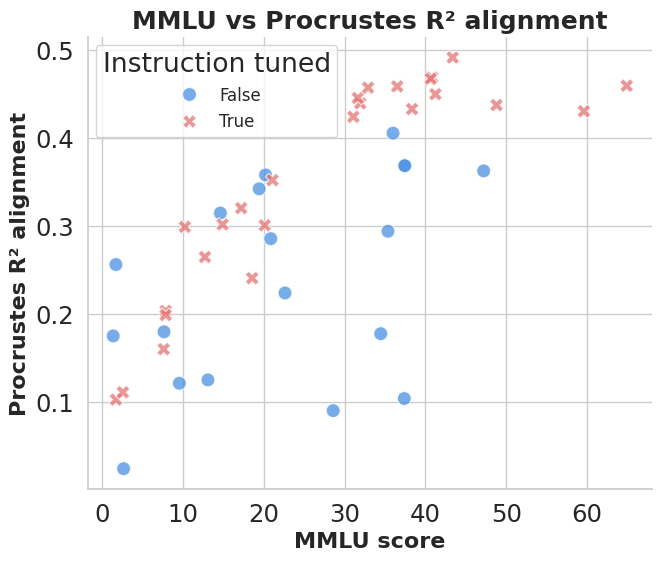

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Copy ---
df = results_df.copy()

# --- Plot ---
sns.set_theme(style="whitegrid", font_scale=1.6)
plt.figure(figsize=(7, 6))

sns.scatterplot(
    data=df,
    x="mmlu",
    y="r2",
    hue="instruct_tuned",       # color by tuning status
    style="instruct_tuned",     # different markers
    palette={True: "#e57373", False: "#4a90e2"},
    s=100,
    alpha=0.75
)

plt.xlabel("MMLU score", fontsize=16, weight="bold")
plt.ylabel("Procrustes R² alignment", fontsize=16, weight="bold")
plt.title("MMLU vs Procrustes R² alignment", fontsize=18, weight="bold")
plt.legend(title="Instruction tuned", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

# --- Copy ---
df = results_df.copy()

# --- Interactive scatter ---
fig = px.scatter(
    df,
    x="mmlu",
    y="r2",
    color="instruct_tuned",
    color_discrete_map={True: "#e57373", False: "#4a90e2"},
    symbol="instruct_tuned",
    hover_data=df.columns,  # show all model attributes on hover
    title="MMLU vs Procrustes R² alignment"
)

fig.update_traces(
    marker=dict(size=10, opacity=0.8, line=dict(width=0.5, color="DarkSlateGrey"))
)

fig.update_layout(
    xaxis_title="MMLU score",
    yaxis_title="Procrustes R² alignment",
    legend_title="Instruction tuned",
    width=800,
    height=600
)

fig.show()


                            OLS Regression Results                            
Dep. Variable:                   mmlu   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     16.71
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           0.000192
Time:                        13:50:49   Log-Likelihood:                -177.02
No. Observations:                  44   AIC:                             358.0
Df Residuals:                      42   BIC:                             361.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         15.0690      3.255      4.

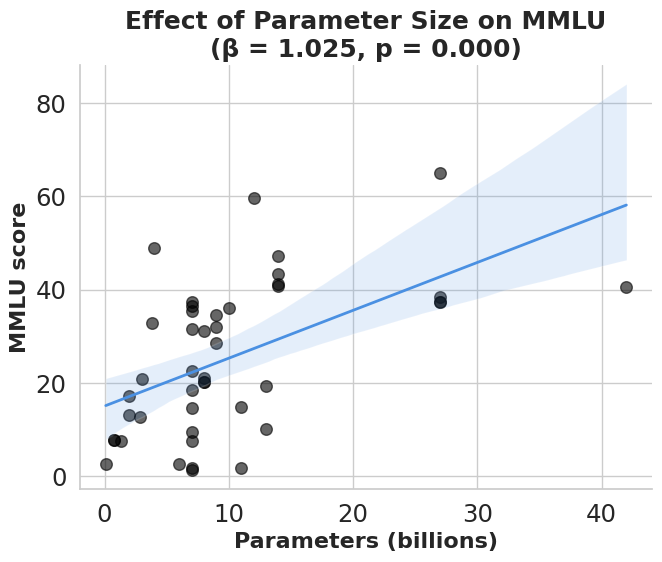

In [ ]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# --- Clean parameters column (convert "2B", "27B", etc. → numeric) ---
df = results_df.copy()
df["params_billion"] = df["parameters"].str.replace("B", "", regex=False).astype(float)

# --- Regression: MMLU ~ Parameters ---
model = smf.ols("mmlu ~ params_billion", data=df).fit()
print(model.summary())

# --- Plot ---
sns.set_theme(style="whitegrid", font_scale=1.6)
plt.figure(figsize=(7, 6))

sns.regplot(
    data=df,
    x="params_billion",
    y="mmlu",
    scatter_kws={"alpha": 0.6, "s": 70, "color": "black"},
    line_kws={"color": "#4a90e2", "linewidth": 2}
)

plt.xlabel("Parameters (billions)", fontsize=16, weight="bold")
plt.ylabel("MMLU score", fontsize=16, weight="bold")
plt.title(
    f"Effect of Parameter Size on MMLU\n"
    f"(β = {model.params['params_billion']:.3f}, p = {model.pvalues['params_billion']:.3f})",
    fontsize=18, weight="bold"
)

sns.despine()
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     16.08
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           5.19e-07
Time:                        14:01:51   Log-Likelihood:                 45.291
No. Observations:                  44   AIC:                            -82.58
Df Residuals:                      40   BIC:                            -75.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1031    

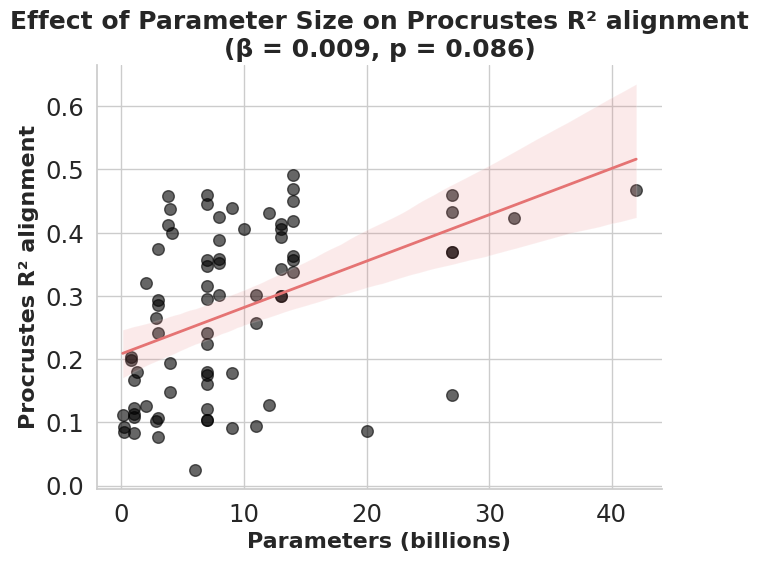

In [ ]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# --- Clean parameters column (convert "2B", "27B", etc. → numeric) ---
df = results_df.copy()
df["params_billion"] = df["parameters"].str.replace("B", "", regex=False).astype(float)

# --- Regression: R² ~ Parameters ---
model = smf.ols("r2 ~ params_billion * mmlu", data=df).fit()
print(model.summary())

# --- Plot ---
sns.set_theme(style="whitegrid", font_scale=1.6)
plt.figure(figsize=(7, 6))

sns.regplot(
    data=df,
    x="params_billion",
    y="r2",
    scatter_kws={"alpha": 0.6, "s": 70, "color": "black"},
    line_kws={"color": "#e57373", "linewidth": 2}
)

plt.xlabel("Parameters (billions)", fontsize=16, weight="bold")
plt.ylabel("Procrustes R² alignment", fontsize=16, weight="bold")
plt.title(
    f"Effect of Parameter Size on Procrustes R² alignment\n"
    f"(β = {model.params['params_billion']:.3f}, p = {model.pvalues['params_billion']:.3f})",
    fontsize=18, weight="bold"
)

sns.despine()
plt.tight_layout()
plt.show()


In [ ]:
# --- Copy ---
df = results_df.copy()

# Get model with max R²
best_r2 = df.loc[df["r2"].idxmax()]

# Get model with max MMLU
best_mmlu = df.loc[df["mmlu"].idxmax()]

print("Model with highest Procrustes R² alignment:")
print(best_r2[["name", "family", "parameters", "training_tokens", 
               "instruct_tuned", "mmlu", "r2"]])
print("\n" + "="*80 + "\n")
print("Model with highest MMLU score:")
print(best_mmlu[["name", "family", "parameters", "training_tokens", 
                 "instruct_tuned", "mmlu", "r2"]])


Model with highest Procrustes R² alignment:
name               qwen-2.5-14b-instruct
family                              qwen
parameters                           14B
training_tokens                      18T
instruct_tuned                      True
mmlu                               43.38
r2                              0.491798
Name: 21, dtype: object


Model with highest MMLU score:
name               gemma-3-27b-it
family                      gemma
parameters                    27B
training_tokens               14T
instruct_tuned               True
mmlu                         64.9
r2                       0.459731
Name: 25, dtype: object


In [ ]:
import plotly.express as px

fig = px.scatter(
    results_df,
    x="bbh",                       # BBH on x-axis
    y="r2",
    color="family",                # color by model family
    hover_data=results_df.columns, # show all attributes on hover
    title="BBH vs Procrustes R² alignment<br>Colored by Model Family"
)

fig.update_traces(
    marker=dict(size=10, opacity=0.75, line=dict(width=0.5, color="DarkSlateGrey"))
)

fig.update_layout(
    xaxis_title="BBH score",
    yaxis_title="Procrustes R² alignment",
    legend_title="Model Family",
    width=800,
    height=600
)

fig.show()


In [ ]:
results_df

,name,family,parameters,activation_function,instruct_tuned,architecture,modality,fine_tuned,training_tokens,n_layers,...,ifeval,bbh,math,gpqa,musr,mmlu,r2,rdm_corr,cka,tuning_status
0,gemma-2-2b,gemma,2B,GeGLU,False,decoder,text,False,2T,26,...,19.93,11.76,2.87,1.68,11.43,13.11,0.125507,0.034266,0.140113,Base model
1,gemma-2-2b-it,gemma,2B,GeGLU,True,decoder,text,True,2T,26,...,56.68,17.98,0.08,3.24,7.08,17.22,0.320657,0.429187,0.483059,Instruction fine-tuned
2,gemma-2-9b,gemma,9B,GeGLU,False,decoder,text,False,8T,42,...,20.40,34.10,13.44,10.51,14.30,34.48,0.177993,0.185771,0.237628,Base model
3,gemma-2-9b-it,gemma,9B,GeGLU,True,decoder,text,True,8T,42,...,74.36,42.14,19.49,14.77,9.74,31.95,0.439693,0.579114,0.664769,Instruction fine-tuned
4,gemma-2-27b,gemma,27B,GeGLU,False,decoder,text,False,13T,46,...,24.75,37.39,16.62,13.42,13.92,37.45,0.368882,0.527818,0.585488,Base model
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Phi-3.5-MoE-instruct,phi,42B,SwiGLU,True,decoder,text,True,4.9T,32,...,69.25,48.77,31.19,14.09,17.33,40.64,0.467597,0.601368,0.649253,Instruction fine-tuned
73,Phi-3.5-vision-instruct,phi,4.1B,SwiGLU,True,decoder,multimodal,True,0.5T,32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.399620,0.459660,0.565391,Instruction fine-tuned
74,Qwen3-4B-Base,qwen,4B,SwiGLU,False,decoder,text,False,36T,36,...,NaN,NaN,NaN,NaN,NaN,NaN,0.193860,0.227185,0.273683,Base model
75,qwen3-8b,qwen,8B,SwiGLU,True,decoder,text,True,36T,36,...,NaN,NaN,NaN,NaN,NaN,NaN,0.388093,0.521510,0.565576,Instruction fine-tuned


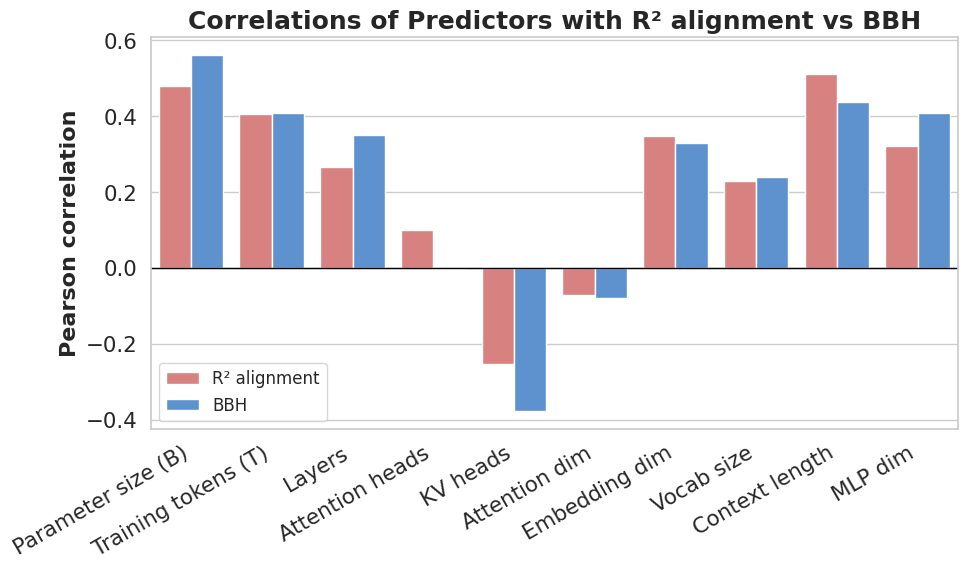

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# --- Copy and preprocess ---
df = results_df.copy()

# Parameters → numeric (billions)
df["params_billion"] = df["parameters"].str.replace("B", "", regex=False).astype(float)

# Training tokens → numeric (trillions)
df["tokens_trillion"] = df["training_tokens"].str.replace("T", "", regex=False).astype(float)

# Predictors of interest
predictors = {
    "Parameter size (B)": "params_billion",
    "Training tokens (T)": "tokens_trillion",
    "Layers": "n_layers",
    "Attention heads": "n_heads",
    "KV heads": "n_kv_heads",
    "Attention dim": "attn_dim",
    "Embedding dim": "hidden_size",
    "Vocab size": "vocab_size",
    "Context length": "max_pos_embed",
    "MLP dim": "intermediate_size"
}

# --- Correlate with r2 and bbh ---
records = []
for label, col in predictors.items():
    df_sub = df[[col, "r2", "bbh"]].dropna()
    if df_sub.empty:
        continue
    r_r2, p_r2 = pearsonr(df_sub[col], df_sub["r2"])
    r_bbh, p_bbh = pearsonr(df_sub[col], df_sub["bbh"])
    records.append({
        "Predictor": label,
        "Metric": "R² alignment",
        "Correlation": r_r2
    })
    records.append({
        "Predictor": label,
        "Metric": "BBH",
        "Correlation": r_bbh
    })

plot_df = pd.DataFrame(records)

# --- Plot ---
sns.set_theme(style="whitegrid", font_scale=1.4)
plt.figure(figsize=(10, 6))

sns.barplot(
    data=plot_df,
    x="Predictor",
    y="Correlation",
    hue="Metric",
    palette=["#e57373", "#4a90e2"]
)

plt.axhline(0, color="black", linewidth=1)
plt.xticks(rotation=30, ha="right")
plt.xlabel("")
plt.ylabel("Pearson correlation", fontsize=16, weight="bold")
plt.title("Correlations of Predictors with R² alignment vs BBH", fontsize=18, weight="bold")

plt.legend(title="", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.formula.api as smf

# --- Copy and clean ---
df = results_df.copy()

# Convert parameters (e.g., "2B", "27B") to numeric billions
df["params_billion"] = df["parameters"].str.replace("B", "", regex=False).astype(float)

# Ensure instruct_tuned is boolean
df["instruct_tuned"] = df["instruct_tuned"].astype(bool)

# --- OLS with interaction ---
formula = "r2 ~ instruct_tuned * params_billion"
model = smf.ols(formula=formula, data=df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     r2   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     17.24
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           1.46e-08
Time:                        13:13:11   Log-Likelihood:                 66.611
No. Observations:                  77   AIC:                            -125.2
Df Residuals:                      73   BIC:                            -115.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

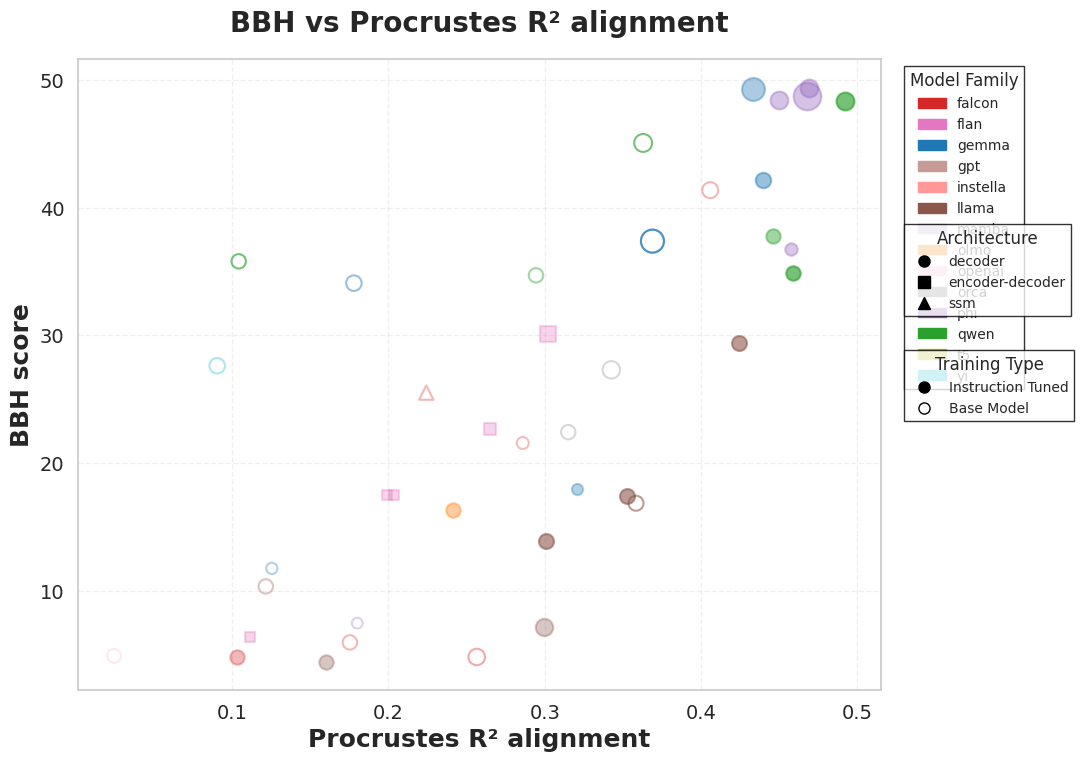

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# --- Reuse helper functions from your aesthetics code ---
def parse_size_value(value_str):
    if not value_str or str(value_str).strip() == '':
        return None
    value_str = str(value_str).strip().upper()
    if value_str.endswith('B'):
        return float(value_str[:-1])
    elif value_str.endswith('T'):
        return float(value_str[:-1]) * 1000
    else:
        try:
            return float(value_str)
        except:
            return None

def parse_training_tokens(tokens_str):
    if not tokens_str or str(tokens_str).strip() == '':
        return None
    tokens_str = str(tokens_str).strip().upper()
    if tokens_str.endswith('T'):
        return float(tokens_str[:-1])
    else:
        try:
            return float(tokens_str)
        except:
            return None

def get_family_colors():
    return {
        'gemma': '#1f77b4',
        'olmo': '#ff7f0e',
        'qwen': '#2ca02c',
        'falcon': '#d62728',
        'phi': '#9467bd',
        'llama': '#8c564b',
        'flan': '#e377c2',
        'orca': '#7f7f7f',
        't5': '#bcbd22',
        'yi': '#17becf',
        'instella': '#ff9896',
        'mamba': '#c5b0d5',
        'gpt': '#c49c94',
        'openai': '#f7b6d3'
    }

def get_architecture_markers():
    return {'decoder': 'o', 'encoder-decoder': 's', 'ssm': '^'}

# --- Main plot ---
def create_bbh_vs_r2_plot(df):
    # Extract data
    r2_vals = df['r2'].values
    bbh_vals = df['bbh'].values
    families = df['family'].str.lower().values
    parameters = df['parameters'].apply(parse_size_value).values
    training_tokens = df['training_tokens'].apply(parse_training_tokens).values
    architectures = df['architecture'].values
    instruct_tuned = df['instruct_tuned'].values
    
    # Set up figure
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Color/marker mappings
    family_colors = get_family_colors()
    arch_markers = get_architecture_markers()
    
    # Normalize training tokens for opacity
    tokens = np.nan_to_num(training_tokens, nan=np.nanmin(training_tokens))
    tokens_norm = (tokens - tokens.min()) / (tokens.max() - tokens.min() + 1e-9)
    alphas = 0.3 + 0.7 * tokens_norm
    
    # Normalize parameters for marker size
    params = np.nan_to_num(parameters, nan=np.nanmin(parameters))
    params_norm = (params - params.min()) / (params.max() - params.min() + 1e-9)
    sizes = 50 + 350 * params_norm
    
    # Plot points
    plotted_families = set()
    plotted_architectures = set()
    
    for x, y, family, arch, instruct, alpha, size in zip(
        r2_vals, bbh_vals, families, architectures, instruct_tuned, alphas, sizes
    ):
        color = family_colors.get(str(family), '#666666')
        marker = arch_markers.get(arch, 'o')
        facecolor = color if instruct else 'none'
        edgecolor = color
        
        ax.scatter(
            x, y,
            s=size,
            c=facecolor if instruct else 'none',
            marker=marker,
            alpha=alpha,
            edgecolors=edgecolor,
            linewidths=1.5,
            zorder=3
        )
        plotted_families.add(family)
        plotted_architectures.add(arch)
    
    # Axes labels
    ax.set_xlabel("Procrustes R² alignment", fontsize=18, fontweight="bold")
    ax.set_ylabel("BBH score", fontsize=18, fontweight="bold")
    ax.set_title("BBH vs Procrustes R² alignment", fontsize=20, fontweight="bold", pad=20)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(True, alpha=0.3, linestyle="--")
    
    # Legends (reuse from t-SNE plot)
    family_handles = [mpatches.Patch(color=family_colors[f], label=f)
                      for f in sorted(plotted_families) if f in family_colors]
    arch_handles = [plt.Line2D([0], [0], marker=arch_markers[a], color='black',
                               linestyle='None', markersize=8, label=a)
                    for a in sorted(plotted_architectures)]
    instruct_handles = [
        plt.Line2D([0], [0], marker='o', color='black', linestyle='None',
                   markersize=8, markerfacecolor='black', label='Instruction Tuned'),
        plt.Line2D([0], [0], marker='o', color='black', linestyle='None',
                   markersize=8, markerfacecolor='none', label='Base Model')
    ]
    
    legend1 = ax.legend(handles=family_handles, title='Model Family',
                        title_fontsize=12, fontsize=10,
                        loc='upper left', bbox_to_anchor=(1.02, 1.0),
                        frameon=True, fancybox=False, edgecolor='black')
    legend2 = ax.legend(handles=arch_handles, title='Architecture',
                        title_fontsize=12, fontsize=10,
                        loc='upper left', bbox_to_anchor=(1.02, 0.75),
                        frameon=True, fancybox=False, edgecolor='black')
    legend3 = ax.legend(handles=instruct_handles, title='Training Type',
                        title_fontsize=12, fontsize=10,
                        loc='upper left', bbox_to_anchor=(1.02, 0.55),
                        frameon=True, fancybox=False, edgecolor='black')
    
    ax.add_artist(legend1)
    ax.add_artist(legend2)
    
    plt.tight_layout()
    plt.subplots_adjust(right=0.75)
    return fig, ax

# Example usage:
fig, ax = create_bbh_vs_r2_plot(results_df)
plt.show()


Saved figure to r2_vs_bbh_edit.pdf


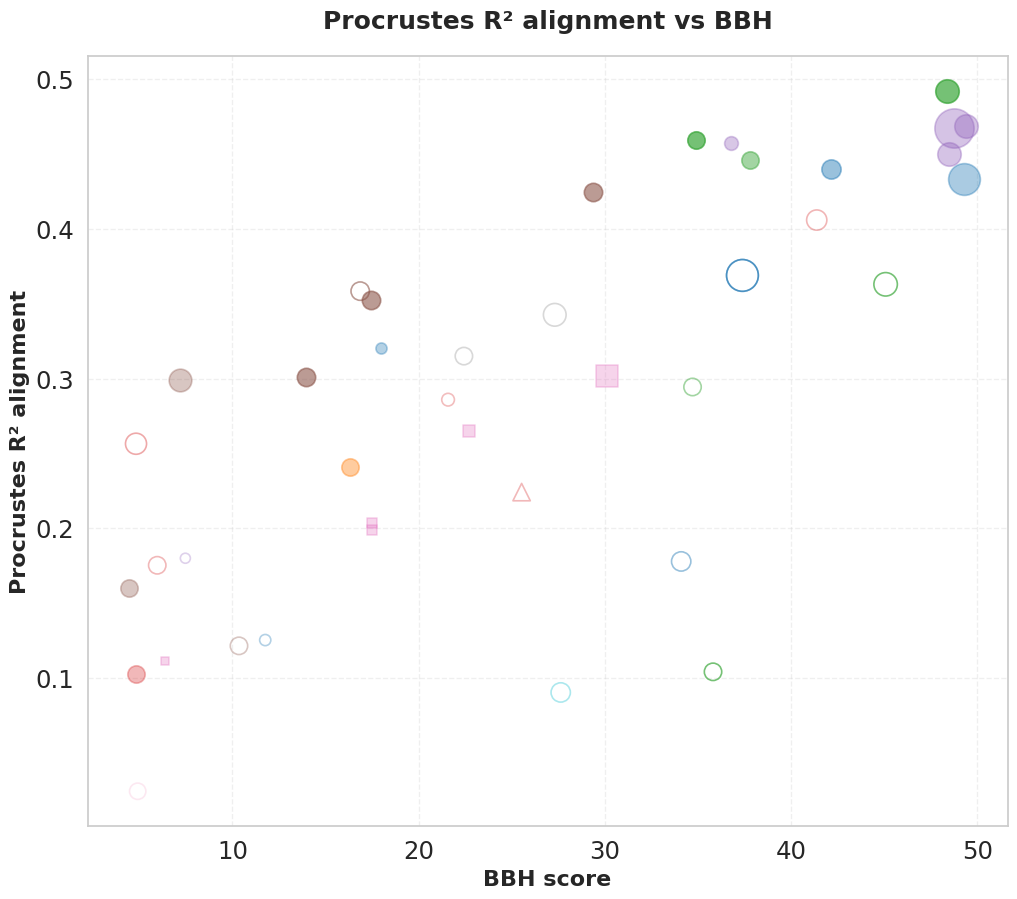

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

def create_r2_vs_bbh_plot(df, savepath="r2_vs_bbh.pdf"):
    # Extract data
    r2_vals = df['r2'].values
    bbh_vals = df['bbh'].values
    families = df['family'].str.lower().values
    parameters = df['parameters'].apply(parse_size_value).values
    training_tokens = df['training_tokens'].apply(parse_training_tokens).values
    architectures = df['architecture'].values
    instruct_tuned = df['instruct_tuned'].values
    
    fig, ax = plt.subplots(figsize=(16, 10))  # bigger canvas
    
    # Color/marker mappings
    family_colors = get_family_colors()
    arch_markers = get_architecture_markers()
    
    # Normalize opacity by training tokens
    tokens = np.nan_to_num(training_tokens, nan=np.nanmin(training_tokens))
    alphas = 0.3 + 0.7 * ((tokens - tokens.min()) / (tokens.max() - tokens.min() + 1e-9))
    
    # Normalize marker size by parameters (expanded range)
    params = np.nan_to_num(parameters, nan=np.nanmin(parameters))
    min_size, max_size = 30, 800
    sizes = min_size + (max_size - min_size) * (
        (params - params.min()) / (params.max() - params.min() + 1e-9)
    )
    
    # Scatter plot (x=BBH, y=R²)
    for x, y, family, arch, instruct, alpha, size in zip(
        bbh_vals, r2_vals, families, architectures, instruct_tuned, alphas, sizes
    ):
        color = family_colors.get(str(family), '#666666')
        marker = arch_markers.get(arch, 'o')
        ax.scatter(
            x, y, s=size,
            c=color if instruct else 'none',
            marker=marker,
            alpha=alpha,
            edgecolors=color,
            linewidths=1.2
        )
    
    # Labels
    ax.set_xlabel("BBH score", fontsize=16, fontweight="bold")
    ax.set_ylabel("Procrustes R² alignment", fontsize=16, fontweight="bold")
    ax.set_title("Procrustes R² alignment vs BBH", fontsize=18, fontweight="bold", pad=20)
    ax.grid(True, alpha=0.3, linestyle="--")
    
    # Legends
    family_handles = [mpatches.Patch(color=family_colors[f], label=f)
                      for f in sorted(set(families)) if f in family_colors]
    arch_handles = [plt.Line2D([0], [0], marker=arch_markers[a], color='black',
                               linestyle='None', markersize=8, label=a)
                    for a in sorted(set(architectures))]
    instruct_handles = [
        plt.Line2D([0], [0], marker='o', color='black', linestyle='None',
                   markersize=8, markerfacecolor='black', label='Instruction Tuned'),
        plt.Line2D([0], [0], marker='o', color='black', linestyle='None',
                   markersize=8, markerfacecolor='none', label='Base Model')
    ]
    
    legend1 = ax.legend(handles=family_handles, title="Model Family",
                        loc="upper left", bbox_to_anchor=(1.05, 1.0))
    ax.add_artist(legend1)
    
    legend2 = ax.legend(handles=arch_handles, title="Architecture",
                        loc="upper left", bbox_to_anchor=(1.05, 0.72))
    ax.add_artist(legend2)
    
    legend3 = ax.legend(handles=instruct_handles, title="Training Type",
                        loc="upper left", bbox_to_anchor=(1.05, 0.45))
    ax.add_artist(legend3)
    
    # Expand space to the right for legends
    plt.subplots_adjust(right=0.7)
    
    # Save to PDF
    plt.savefig(savepath, dpi=300, facecolor="white", bbox_inches="tight")
    print(f"Saved figure to {savepath}")
    return fig, ax

# Example usage:
fig, ax = create_r2_vs_bbh_plot(results_df, savepath="r2_vs_bbh_edit.pdf")
plt.show()


In [13]:
results_df["average"]

0     10.13
1     17.05
2     21.21
3     32.07
4     23.93
      ...  
72    36.88
73      NaN
74      NaN
75      NaN
76      NaN
Name: average, Length: 77, dtype: float64

In [24]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

def test_eval(results_df, iv):
    # --- Copy to avoid modifying original ---
    df = results_df.copy()
    
    # Scale eval metrics except r2 (already scaled)
    for col in ["bbh", "mmlu", "math", "gpqa"]:
        df[col + "_scaled"] = df[col] / 100.0
    
    # --- Long format with r2 included ---
    long_df = df.melt(
        id_vars=[iv],
        value_vars=["bbh_scaled", "mmlu_scaled", "math_scaled", "gpqa_scaled", "r2"],
        var_name="test",
        value_name="score"
    )
    long_df["test"] = long_df["test"].str.replace("_scaled", "", regex=False)
    
    # Drop rows with missing values
    long_df = long_df.dropna(subset=["score", iv])
    
    # --- Make "r2" the baseline category ---
    long_df["test"] = pd.Categorical(
        long_df["test"],
        categories=["r2", "math", "bbh", "mmlu", "gpqa"],
        ordered=True
    )
    
    # --- Fit models ---
    formula_full = f"score ~ {iv} * test"
    formula_reduced = f"score ~ {iv} + test"
    
    model_full = smf.ols(formula=formula_full, data=long_df).fit()
    model_reduced = smf.ols(formula=formula_reduced, data=long_df).fit()
    
    # --- Compare models ---
    comparison = anova_lm(model_reduced, model_full)
    
    print("\n===== Reduced Model =====")
    print(model_reduced.summary())
    print("\n===== Full Model =====")
    print(model_full.summary())
    print("\n===== Model Comparison (Likelihood Ratio Test) =====")
    print(comparison)
    
    return model_reduced, model_full, comparison, long_df

# Example usage:
# model_reduced, model_full, comparison, long_df = test_eval(results_df, "parameters")


In [30]:
results_df

,name,family,parameters,activation_function,instruct_tuned,architecture,modality,fine_tuned,training_tokens,n_layers,...,ifeval,bbh,math,gpqa,musr,mmlu,r2,rdm_corr,cka,tuning_status
0,gemma-2-2b,gemma,2B,GeGLU,False,decoder,text,False,2T,26,...,19.93,11.76,2.87,1.68,11.43,13.11,0.125507,0.034266,0.140113,Base model
1,gemma-2-2b-it,gemma,2B,GeGLU,True,decoder,text,True,2T,26,...,56.68,17.98,0.08,3.24,7.08,17.22,0.320657,0.429187,0.483059,Instruction fine-tuned
2,gemma-2-9b,gemma,9B,GeGLU,False,decoder,text,False,8T,42,...,20.40,34.10,13.44,10.51,14.30,34.48,0.177993,0.185771,0.237628,Base model
3,gemma-2-9b-it,gemma,9B,GeGLU,True,decoder,text,True,8T,42,...,74.36,42.14,19.49,14.77,9.74,31.95,0.439693,0.579114,0.664769,Instruction fine-tuned
4,gemma-2-27b,gemma,27B,GeGLU,False,decoder,text,False,13T,46,...,24.75,37.39,16.62,13.42,13.92,37.45,0.368882,0.527818,0.585488,Base model
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Phi-3.5-MoE-instruct,phi,42B,SwiGLU,True,decoder,text,True,4.9T,32,...,69.25,48.77,31.19,14.09,17.33,40.64,0.467597,0.601368,0.649253,Instruction fine-tuned
73,Phi-3.5-vision-instruct,phi,4.1B,SwiGLU,True,decoder,multimodal,True,0.5T,32,...,NaN,NaN,NaN,NaN,NaN,NaN,0.399620,0.459660,0.565391,Instruction fine-tuned
74,Qwen3-4B-Base,qwen,4B,SwiGLU,False,decoder,text,False,36T,36,...,NaN,NaN,NaN,NaN,NaN,NaN,0.193860,0.227185,0.273683,Base model
75,qwen3-8b,qwen,8B,SwiGLU,True,decoder,text,True,36T,36,...,NaN,NaN,NaN,NaN,NaN,NaN,0.388093,0.521510,0.565576,Instruction fine-tuned


In [35]:
model_reduced, model_full, comparison, long_df = test_eval(results_df, "modality")


===== Reduced Model =====
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     16.33
Date:                Wed, 24 Sep 2025   Prob (F-statistic):           8.73e-16
Time:                        17:09:24   Log-Likelihood:                 134.15
No. Observations:                 250   AIC:                            -254.3
Df Residuals:                     243   BIC:                            -229.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
I